# Miguel Ángel García Ruíz

# Taller 3: Jets

A continuación se anexa los resultados obtenidos únicamente de los puntos de los ejercicios pedidos en el notebook de guía visto en la clase correspondiente a Jets. No se anexa el procedimiento en el mismo notebook guía ya que habría quedado muy extendido y parte del mismo era para obtener unos resultados que no eran necesarios para desarrollar el taller. Así, éste notebook contiene lo mínimo necesario (versión simplificada) para desarrollar los puntos del taller 3.

Para ello, abrimos el archivo root que fue usado en el taller 2 (el de Tracks & Clusters) ya sea usando un enlace en el navegador o descargando el archivo root y colocandolo en la misma carpeta.

In [1]:
#include <iostream>
#include <string>
#include <stdio.h>

In [2]:
//TFile *file = TFile::Open("Tracks_Clusters.root"); 
TFile *file = TFile::Open("https://csandova.web.cern.ch/csandova/HEP-Ex-Course/Code/TracksClusters/Tracks_Clusters.root");

In [3]:
TTree *tree = (TTree*) file->Get("JetRecoTree");
tree->Print()

******************************************************************************
*Tree    :JetRecoTree: JetRecoTree                                            *
*Entries :   102900 : Total =      3334789039 bytes  File  Size = 2227126936 *
*        :          : Tree compression factor =   1.50                       *
******************************************************************************
*Br    0 :EventNumber : EventNumber/l                                        *
*Entries :   102900 : Total  Size=     836872 bytes  File Size  =     448624 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=   1.86     *
*............................................................................*
*Br    1 :RunNumber : RunNumber/l                                            *
*Entries :   102900 : Total  Size=     836610 bytes  File Size  =      20416 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=  40.84     *
*..................................................

RecoJets_R4 - TrackJets_R4 - RecoJets_R10 - RecoJets_R10_Trimmed - TruthJets_R4 - TruthJets_R10 - TruthJets_R10_Trimmed

## Excersice 1: Compare the leading truth jet pT with the leading reco jet pT, with and without event weights

### Comparison between leading truth R4 and reco jet R4 pT without consider the event weight

En primer lugar, vamos a comparar el leading truth jet pT con el leading reco jet pT SIN CONSIDERAR el EVENT WEIGHT. Para ello vamos a guardar la información de los branches del truth y reco jet como se muestra a continuación:

In [4]:
vector<float> *reco_R4_pt;
vector<float> *truth_R4_pt;

tree->SetBranchAddress("RecoJets_R4_pt", &reco_R4_pt);
tree->SetBranchAddress("TruthJets_R4_pt", &truth_R4_pt);

Creamos el canvas para poder visualizar los resultados:

In [5]:
TCanvas *canvas = new TCanvas("Canvas","",800,600);

Definimos los histogramas para hacer la comparación sin tener en cuenta el event weight:

In [6]:
TH1F *hist_leadrecoR4_pt_wo_evtw = new TH1F("Leading jet R4 pT wo evtw","Leading reco R4 jet pT; pT(GeV);Events",50,10,300);
TH1F *hist_leadtruthR4_pt_wo_evtw = new TH1F("Leading-jet R4 pT wo evtw","Leading truth R4 jet pT; pT(GeV);Events",50,10,300);

Una vez definidos los histogramas, llenamos a traves de un loop los histogramas de manera que podamos comparar el pT del leading truth y reco jet:

In [7]:
int nentries, nbytes;
nentries = (Int_t)tree->GetEntries();

for (int ii=0; ii<nentries; ii++)
{
    nbytes = tree->GetEntry(ii);   
    if(reco_R4_pt->size()>0){
    hist_leadrecoR4_pt_wo_evtw->Fill(reco_R4_pt->at(0)/1000.); //without event weight 
    }
    
    if(truth_R4_pt->size()>0){
    hist_leadtruthR4_pt_wo_evtw->Fill(truth_R4_pt->at(0)/1000.);  //without event weight
    }
}

std::cout << "Done!" << std::endl;

Done!


Una vez llenados los histogramas, podemos graficarlos y hacer la comparación:

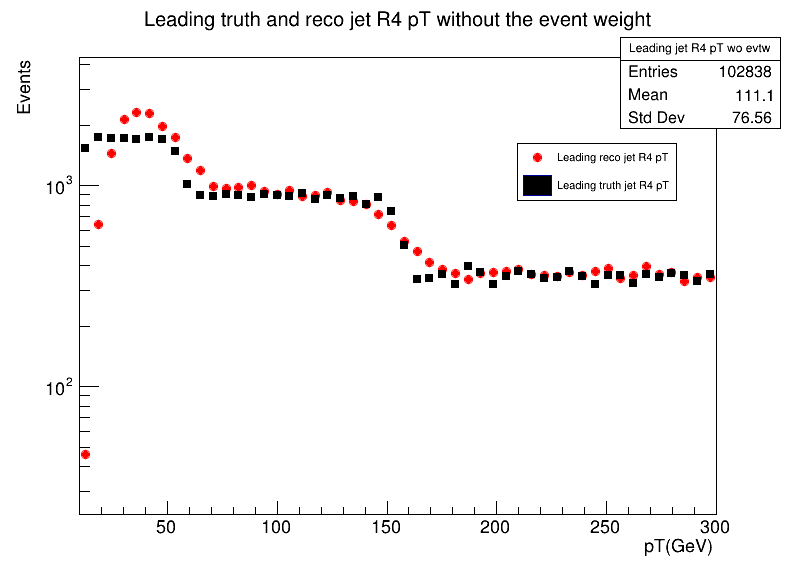

In [8]:
//Comparison between leading truth and reco jet R4 pT without consider the event weight
TLegend *leg1 = new TLegend(0.65, 0.65, 0.85, 0.75);

hist_leadrecoR4_pt_wo_evtw->SetMarkerStyle(20);
hist_leadrecoR4_pt_wo_evtw->SetMarkerColor(kRed);
hist_leadrecoR4_pt_wo_evtw->SetFillStyle(1001);
hist_leadrecoR4_pt_wo_evtw->SetFillColor(kRed);
hist_leadrecoR4_pt_wo_evtw->SetTitle("Leading truth and reco jet R4 pT without the event weight");
hist_leadrecoR4_pt_wo_evtw->Draw("P");
hist_leadtruthR4_pt_wo_evtw->SetMarkerStyle(21);
hist_leadtruthR4_pt_wo_evtw->SetMarkerColor(kBlack);
hist_leadtruthR4_pt_wo_evtw->SetFillStyle(1003);
hist_leadtruthR4_pt_wo_evtw->SetFillColor(kBlack);
hist_leadtruthR4_pt_wo_evtw->Draw("sameP");
leg1->AddEntry(hist_leadrecoR4_pt_wo_evtw, "Leading reco jet R4 pT", "p");
leg1->AddEntry(hist_leadtruthR4_pt_wo_evtw, "Leading truth jet R4 pT", "f");
leg1->Draw();
canvas->SetLogy();
canvas->Draw();

### Comparison between leading truth R4 and reco R4 jet pT considering the event weight

Ahora, para tener en cuenta el EVENT WEIGHT debemos extraer la información del branch:

In [9]:
float evtw = -1;

tree->SetBranchAddress("EventWeight", &evtw);

Definimos los histogramas para llenar el leading jet pT con el event weight:

In [10]:
TH1F *hist_leadrecoR4_pt_evtw = new TH1F("Leading jet R4 pT evtw","Leading reco R4 jet pT evtw; pT(GeV);Events",50,10,200);
TH1F *hist_leadtruthR4_pt_evtw = new TH1F("Leading-jet R4 pT evtw","Leading truth R4 jet pT evtw; pT(GeV);Events",50,10,200);

Y llenamos con un loop los histogramas previamente definidos:

In [11]:
nentries = (Int_t)tree->GetEntries();
nbytes = 0;

for (int ii=0; ii<nentries; ii++)
{
    nbytes = tree->GetEntry(ii);   
    if(reco_R4_pt->size()>0){
    hist_leadrecoR4_pt_evtw->Fill(reco_R4_pt->at(0)/1000., evtw); //with event weight 
    }
    
    if(truth_R4_pt->size()>0){
    hist_leadtruthR4_pt_evtw->Fill(truth_R4_pt->at(0)/1000., evtw);  //with event weight
    }
}

std::cout << "Done!" << std::endl;

Done!


Luego dibujamos ambos histogramas en el mismo canvas para hacer la comparación entre los leading jet pT con el event weight:

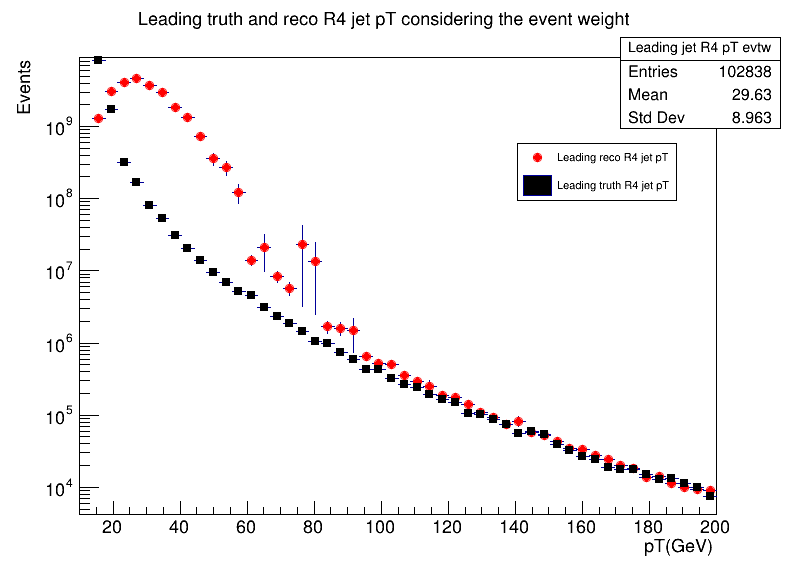

In [12]:
//Comparison between leading truth and reco R4 jet pT considering the event weight
TLegend *leg2 = new TLegend(0.65, 0.65, 0.85, 0.75);

hist_leadrecoR4_pt_evtw->SetMarkerStyle(20);
hist_leadrecoR4_pt_evtw->SetMarkerColor(kRed);
hist_leadrecoR4_pt_evtw->SetFillStyle(1001);
hist_leadrecoR4_pt_evtw->SetFillColor(kRed);
hist_leadrecoR4_pt_evtw->SetTitle("Leading truth and reco R4 jet pT considering the event weight");
hist_leadrecoR4_pt_evtw->Draw("P");
hist_leadtruthR4_pt_evtw->SetMarkerStyle(21);
hist_leadtruthR4_pt_evtw->SetMarkerColor(kBlack);
hist_leadtruthR4_pt_evtw->SetFillStyle(1003);
hist_leadtruthR4_pt_evtw->SetFillColor(kBlack);
hist_leadtruthR4_pt_evtw->Draw("sameP");
leg2->AddEntry(hist_leadrecoR4_pt_wo_evtw, "Leading reco R4 jet pT", "p");
leg2->AddEntry(hist_leadtruthR4_pt_wo_evtw, "Leading truth R4 jet pT", "f");
leg2->Draw();
canvas->SetLogy();
canvas->Draw();

### Comparison between leading truth R10 and reco jet R10 pT without consider the event weight

In [13]:
vector<float> *reco_R10_pt;
vector<float> *truth_R10_pt;

tree->SetBranchAddress("RecoJets_R10_pt", &reco_R10_pt);
tree->SetBranchAddress("TruthJets_R10_pt", &truth_R10_pt);

In [14]:
TH1F *hist_leadrecoR10_pt_wo_evtw = new TH1F("Leading jet R10 pT wo evtw","Leading reco R10 jet pT; pT(GeV);Events",75,100,500);
TH1F *hist_leadtruthR10_pt_wo_evtw = new TH1F("Leading-jet R10 pT wo evtw","Leading truth R10 jet pT; pT(GeV);Events",75,100,500);

In [15]:
int nentries, nbytes;
nentries = (Int_t)tree->GetEntries();

for (int ii=0; ii<nentries; ii++)
{
    nbytes = tree->GetEntry(ii);   
    if(reco_R10_pt->size()>0){
    hist_leadrecoR10_pt_wo_evtw->Fill(reco_R10_pt->at(0)/1000.); //without event weight 
    }
    
    if(truth_R10_pt->size()>0){
    hist_leadtruthR10_pt_wo_evtw->Fill(truth_R10_pt->at(0)/1000.);  //without event weight
    }
}

std::cout << "Done!" << std::endl;

Done!


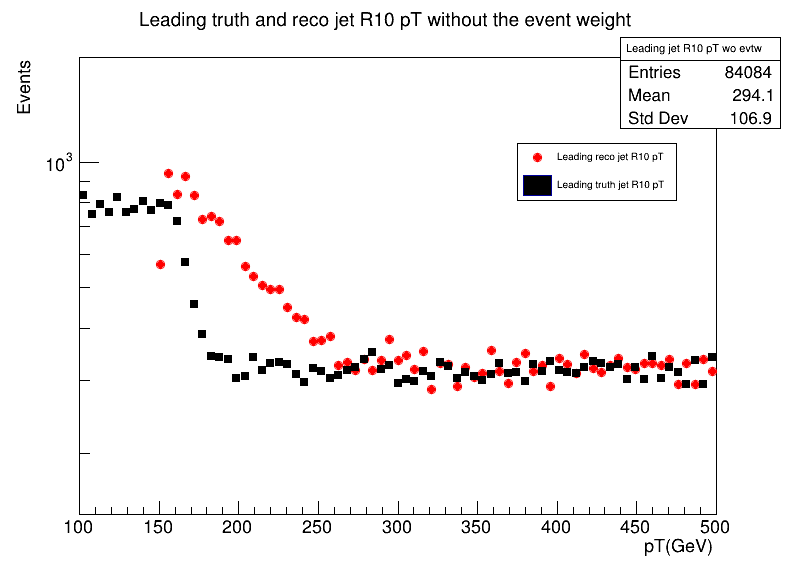

In [16]:
//Comparison between leading truth and reco jet R10 pT without consider the event weight
TLegend *leg3 = new TLegend(0.65, 0.65, 0.85, 0.75);

hist_leadrecoR10_pt_wo_evtw->SetMarkerStyle(20);
hist_leadrecoR10_pt_wo_evtw->SetMarkerColor(kRed);
hist_leadrecoR10_pt_wo_evtw->SetFillStyle(1001);
hist_leadrecoR10_pt_wo_evtw->SetFillColor(kRed);
hist_leadrecoR10_pt_wo_evtw->SetTitle("Leading truth and reco jet R10 pT without the event weight");
hist_leadrecoR10_pt_wo_evtw->Draw("P");
hist_leadtruthR10_pt_wo_evtw->SetMarkerStyle(21);
hist_leadtruthR10_pt_wo_evtw->SetMarkerColor(kBlack);
hist_leadtruthR10_pt_wo_evtw->SetFillStyle(1003);
hist_leadtruthR10_pt_wo_evtw->SetFillColor(kBlack);
hist_leadtruthR10_pt_wo_evtw->Draw("sameP");
leg3->AddEntry(hist_leadrecoR10_pt_wo_evtw, "Leading reco jet R10 pT", "p");
leg3->AddEntry(hist_leadtruthR10_pt_wo_evtw, "Leading truth jet R10 pT", "f");
leg3->Draw();
canvas->SetLogy();
canvas->Draw();

### Comparison between leading truth R10 and reco R10 jet pT considering the event weight

In [17]:
TH1F *hist_leadrecoR10_pt_evtw = new TH1F("Leading jet R10 pT evtw","Leading reco R10 jet pT evtw; pT(GeV);Events",75,100,500);
TH1F *hist_leadtruthR10_pt_evtw = new TH1F("Leading-jet R10 pT evtw","Leading truth R10 jet pT evtw; pT(GeV);Events",75,100,500);

In [18]:
nentries = (Int_t)tree->GetEntries();
nbytes = 0;

for (int ii=0; ii<nentries; ii++)
{
    nbytes = tree->GetEntry(ii);   
    if(reco_R10_pt->size()>0){
    hist_leadrecoR10_pt_evtw->Fill(reco_R10_pt->at(0)/1000., evtw); //with event weight 
    }
    
    if(truth_R10_pt->size()>0){
    hist_leadtruthR10_pt_evtw->Fill(truth_R10_pt->at(0)/1000., evtw);  //with event weight
    }
}

std::cout << "Done!" << std::endl;

Done!


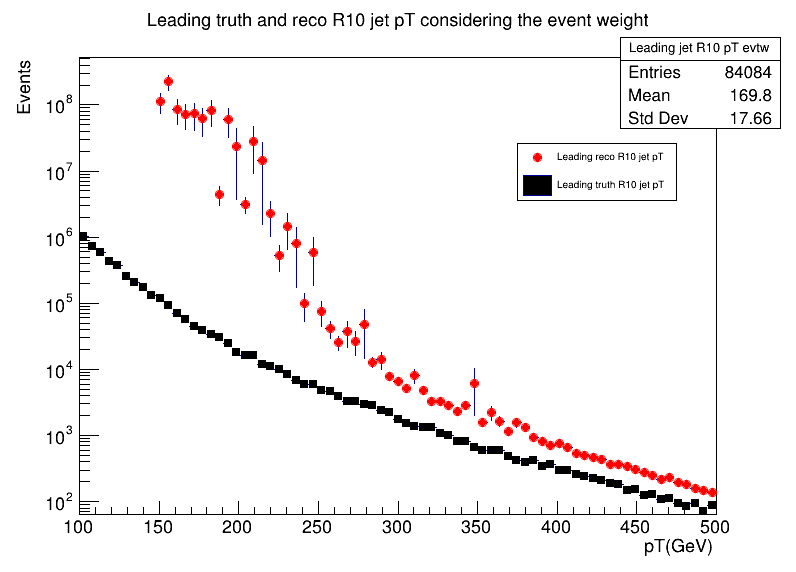

In [19]:
//Comparison between leading truth and reco R10 jet pT considering the event weight
TLegend *leg4 = new TLegend(0.65, 0.65, 0.85, 0.75);

hist_leadrecoR10_pt_evtw->SetMarkerStyle(20);
hist_leadrecoR10_pt_evtw->SetMarkerColor(kRed);
hist_leadrecoR10_pt_evtw->SetFillStyle(1001);
hist_leadrecoR10_pt_evtw->SetFillColor(kRed);
hist_leadrecoR10_pt_evtw->SetTitle("Leading truth and reco R10 jet pT considering the event weight");
hist_leadrecoR10_pt_evtw->Draw("P");
hist_leadtruthR10_pt_evtw->SetMarkerStyle(21);
hist_leadtruthR10_pt_evtw->SetMarkerColor(kBlack);
hist_leadtruthR10_pt_evtw->SetFillStyle(1003);
hist_leadtruthR10_pt_evtw->SetFillColor(kBlack);
hist_leadtruthR10_pt_evtw->Draw("sameP");
leg4->AddEntry(hist_leadrecoR10_pt_wo_evtw, "Leading reco R10 jet pT", "p");
leg4->AddEntry(hist_leadtruthR10_pt_wo_evtw, "Leading truth R10 jet pT", "f");
leg4->Draw();
canvas->SetLogy();
canvas->Draw();

### Comparison between leading truth R10 and reco jet R10 Trimmed pT without consider the event weight

In [20]:
vector<float> *reco_R10_trimmed_pt;
vector<float> *truth_R10_trimmed_pt;

tree->SetBranchAddress("RecoJets_R10_Trimmed_pt", &reco_R10_trimmed_pt);
tree->SetBranchAddress("TruthJets_R10_Trimmed_pt", &truth_R10_trimmed_pt);

In [21]:
TH1F *hist_leadrecoR10_trimmed_pt_wo_evtw = new TH1F("Leading jet R10 Trimmed pT wo evtw","Leading reco R10 Trimmed jet pT; pT(GeV);Events",75,100,500);
TH1F *hist_leadtruthR10_trimmed_pt_wo_evtw = new TH1F("Leading-jet R10 Trimmed pT wo evtw","Leading truth R10 Trimmed jet pT; pT(GeV);Events",75,100,500);

In [22]:
int nentries, nbytes;
nentries = (Int_t)tree->GetEntries();

for (int ii=0; ii<nentries; ii++)
{
    nbytes = tree->GetEntry(ii);   
    if(reco_R10_trimmed_pt->size()>0){
    hist_leadrecoR10_trimmed_pt_wo_evtw->Fill(reco_R10_trimmed_pt->at(0)/1000.); //without event weight 
    }
    
    if(truth_R10_trimmed_pt->size()>0){
    hist_leadtruthR10_trimmed_pt_wo_evtw->Fill(truth_R10_trimmed_pt->at(0)/1000.);  //without event weight
    }
}

std::cout << "Done!" << std::endl;

Done!


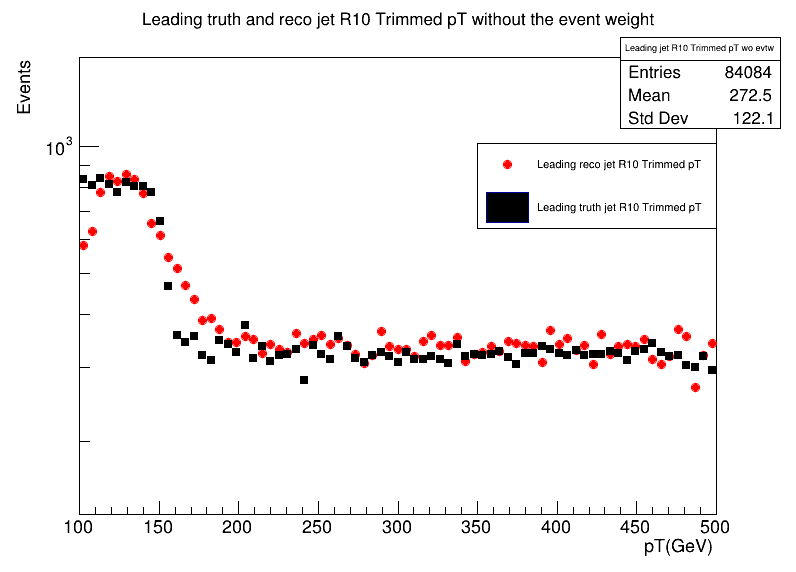

In [23]:
//Comparison between leading truth and reco jet R10 Trimmed pT without consider the event weight
TLegend *leg5 = new TLegend(0.6, 0.60, 0.9, 0.75);

hist_leadrecoR10_trimmed_pt_wo_evtw->SetMarkerStyle(20);
hist_leadrecoR10_trimmed_pt_wo_evtw->SetMarkerColor(kRed);
hist_leadrecoR10_trimmed_pt_wo_evtw->SetFillStyle(1001);
hist_leadrecoR10_trimmed_pt_wo_evtw->SetFillColor(kRed);
hist_leadrecoR10_trimmed_pt_wo_evtw->SetTitle("Leading truth and reco jet R10 Trimmed pT without the event weight");
hist_leadrecoR10_trimmed_pt_wo_evtw->Draw("P");
hist_leadtruthR10_trimmed_pt_wo_evtw->SetMarkerStyle(21);
hist_leadtruthR10_trimmed_pt_wo_evtw->SetMarkerColor(kBlack);
hist_leadtruthR10_trimmed_pt_wo_evtw->SetFillStyle(1003);
hist_leadtruthR10_trimmed_pt_wo_evtw->SetFillColor(kBlack);
hist_leadtruthR10_trimmed_pt_wo_evtw->Draw("sameP");
leg5->AddEntry(hist_leadrecoR10_trimmed_pt_wo_evtw, "Leading reco jet R10 Trimmed pT", "p");
leg5->AddEntry(hist_leadtruthR10_trimmed_pt_wo_evtw, "Leading truth jet R10 Trimmed pT", "f");
leg5->Draw();
canvas->SetLogy();
canvas->Draw();

### Comparison between leading truth R10 and reco R10 Trimmed jet pT considering the event weight

In [24]:
TH1F *hist_leadrecoR10_trimmed_pt_evtw = new TH1F("Leading jet R10 Trimmed pT evtw","Leading reco R10 Trimmed jet pT evtw; pT(GeV);Events",75,100,500);
TH1F *hist_leadtruthR10_trimmed_pt_evtw = new TH1F("Leading-jet R10 Trimmed pT evtw","Leading truth R10 Trimmed jet pT evtw; pT(GeV);Events",75,100,500);

In [25]:
nentries = (Int_t)tree->GetEntries();
nbytes = 0;

for (int ii=0; ii<nentries; ii++)
{
    nbytes = tree->GetEntry(ii);   
    if(reco_R10_trimmed_pt->size()>0){
    hist_leadrecoR10_trimmed_pt_evtw->Fill(reco_R10_trimmed_pt->at(0)/1000., evtw); //with event weight 
    }
    
    if(truth_R10_trimmed_pt->size()>0){
    hist_leadtruthR10_trimmed_pt_evtw->Fill(truth_R10_trimmed_pt->at(0)/1000., evtw);  //with event weight
    }
}

std::cout << "Done!" << std::endl;

Done!


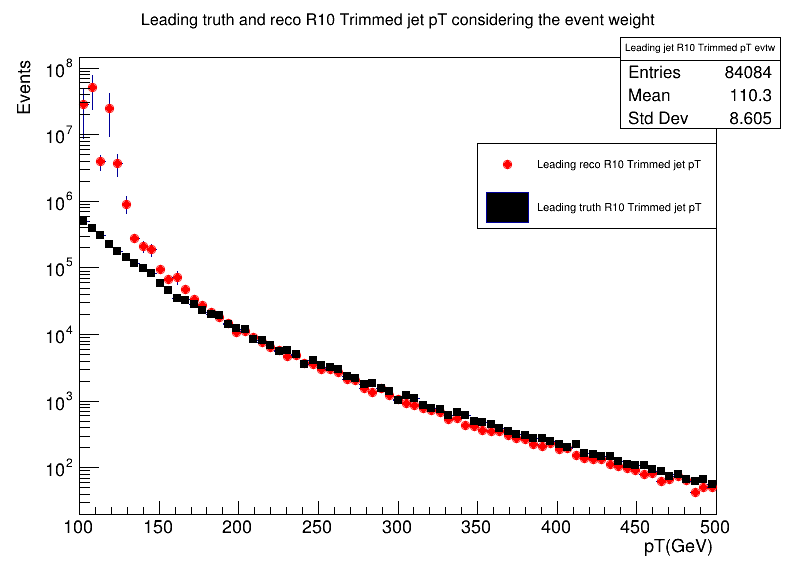

In [26]:
//Comparison between leading truth and reco R10 Trimmed jet pT considering the event weight
TLegend *leg6 = new TLegend(0.6, 0.6, 0.9, 0.75);

hist_leadrecoR10_trimmed_pt_evtw->SetMarkerStyle(20);
hist_leadrecoR10_trimmed_pt_evtw->SetMarkerColor(kRed);
hist_leadrecoR10_trimmed_pt_evtw->SetFillStyle(1001);
hist_leadrecoR10_trimmed_pt_evtw->SetFillColor(kRed);
hist_leadrecoR10_trimmed_pt_evtw->SetTitle("Leading truth and reco R10 Trimmed jet pT considering the event weight");
hist_leadrecoR10_trimmed_pt_evtw->Draw("P");
hist_leadtruthR10_trimmed_pt_evtw->SetMarkerStyle(21);
hist_leadtruthR10_trimmed_pt_evtw->SetMarkerColor(kBlack);
hist_leadtruthR10_trimmed_pt_evtw->SetFillStyle(1003);
hist_leadtruthR10_trimmed_pt_evtw->SetFillColor(kBlack);
hist_leadtruthR10_trimmed_pt_evtw->Draw("sameP");
leg6->AddEntry(hist_leadrecoR10_trimmed_pt_wo_evtw, "Leading reco R10 Trimmed jet pT", "p");
leg6->AddEntry(hist_leadtruthR10_trimmed_pt_wo_evtw, "Leading truth R10 Trimmed jet pT", "f");
leg6->Draw();
canvas->SetLogy();
canvas->Draw();

# Excersice 2: Repeat for all jets pT.

### Comparison between all truth R4 and reco R4 jets pT without consider event weight

En primer lugar, vamos a considerar el pT de todos los jets (truth y reco) sin considerar el event weight. Por lo tanto, definimos los histogramas:

In [27]:
TH1F *hist_recoR4_pt_wo_evtw = new TH1F("All jets R4 pT","Reco-Jet R4 pT; pT(GeV);Events",50,10,300);
TH1F *hist_truthR4_pt_wo_evtw = new TH1F("All-jets R4 pT","Truth-Jet R4 pT; pT(GeV);Events", 50, 10, 300);

In [28]:
nentries = (Int_t)tree->GetEntries();
nbytes = 0;

for (int ii=0; ii<nentries; ii++)
{
    nbytes = (Int_t)tree->GetEntry(ii);
    if(reco_R4_pt->size()>0)
    {
        for(int jj=0; jj<reco_R4_pt->size(); jj++)
        {
            hist_recoR4_pt_wo_evtw->Fill(reco_R4_pt->at(jj)/1000.);
        }
    }
    
    if(truth_R4_pt->size()>0)
    {
        for(int jj=0; jj<truth_R4_pt->size(); jj++)
        {
            hist_truthR4_pt_wo_evtw->Fill(truth_R4_pt->at(jj)/1000.);
        }
    }
}

std::cout << "Done!" << endl;

Done!


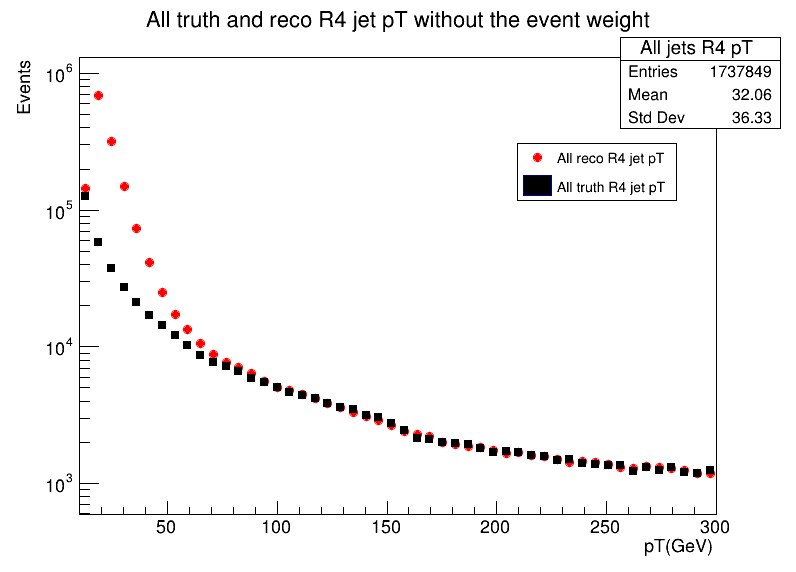

In [29]:
//Comparison between all truth R4 and reco R4 jets pT without consider the event weight
TLegend *leg7 = new TLegend(0.65, 0.65, 0.85, 0.75);

hist_recoR4_pt_wo_evtw->SetMarkerStyle(20);
hist_recoR4_pt_wo_evtw->SetMarkerColor(kRed);
hist_recoR4_pt_wo_evtw->SetFillStyle(1001);
hist_recoR4_pt_wo_evtw->SetFillColor(kRed);
hist_recoR4_pt_wo_evtw->SetTitle("All truth and reco R4 jet pT without the event weight");
hist_recoR4_pt_wo_evtw->Draw("P");
hist_truthR4_pt_wo_evtw->SetMarkerStyle(21);
hist_truthR4_pt_wo_evtw->SetMarkerColor(kBlack);
hist_truthR4_pt_wo_evtw->SetFillStyle(1003);
hist_truthR4_pt_wo_evtw->SetFillColor(kBlack);
hist_truthR4_pt_wo_evtw->Draw("sameP");
leg7->AddEntry(hist_recoR4_pt_wo_evtw, "All reco R4 jet pT", "p");
leg7->AddEntry(hist_truthR4_pt_wo_evtw, "All truth R4 jet pT", "f");
leg7->Draw();
canvas->SetLogy();
canvas->Draw();

### Comparison between all truth R4 and reco R4 jets pT considering event weight

In [30]:
TH1F *hist_recoR4_pt_evtw = new TH1F("All jet R4 pT evtw", "Reco R4 jet pT evtw; pT(GeV);Events",50,10,200);
TH1F *hist_truthR4_pt_evtw = new TH1F("All-jet R4 pT evtw", "Truth R4 jet pT evtw; pT(GeV);Events",50,10,200);

In [31]:
nentries = (Int_t)tree->GetEntries();
nbytes = 0;

for(int ii=0; ii<nentries; ii++)
{
    nbytes = (Int_t)tree->GetEntry(ii);
    if(reco_R4_pt->size()>0)
    {
        for(int jj=0; jj<reco_R4_pt->size(); jj++)
        {
            hist_recoR4_pt_evtw->Fill(reco_R4_pt->at(jj)/1000., evtw);
        }
    }
    
    if(truth_R4_pt->size()>0)
    {
        for(int jj=0; jj<truth_R4_pt->size(); jj++)
        {
            hist_truthR4_pt_evtw->Fill(truth_R4_pt->at(jj)/1000., evtw);
        }
    }
}

std::cout << "Done!" << endl;

Done!


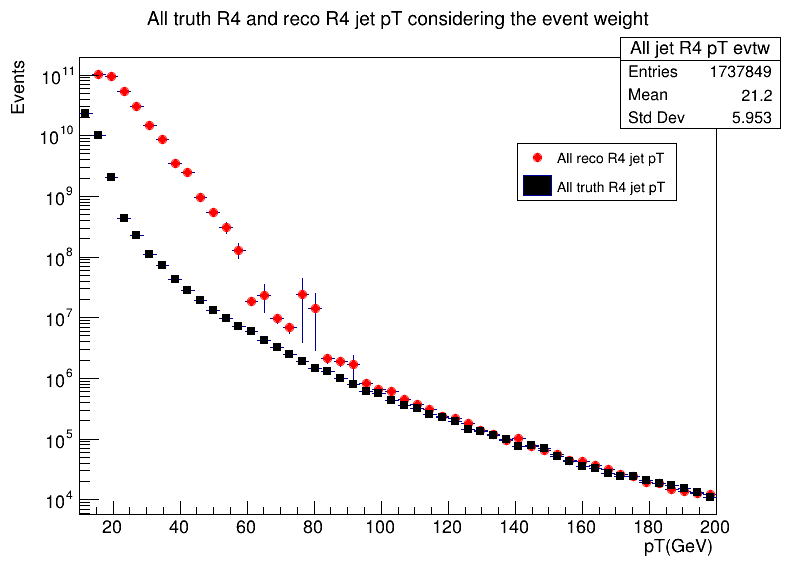

In [32]:
//Comparison between all truth R4 and reco R4 jet pT considering the event weight
TLegend *leg8 = new TLegend(0.65, 0.65, 0.85, 0.75);

hist_recoR4_pt_evtw->SetMarkerStyle(20);
hist_recoR4_pt_evtw->SetMarkerColor(kRed);
hist_recoR4_pt_evtw->SetFillStyle(1001);
hist_recoR4_pt_evtw->SetFillColor(kRed);
hist_recoR4_pt_evtw->SetTitle("All truth R4 and reco R4 jet pT considering the event weight");
hist_recoR4_pt_evtw->Draw("P");
hist_truthR4_pt_evtw->SetMarkerStyle(21);
hist_truthR4_pt_evtw->SetMarkerColor(kBlack);
hist_truthR4_pt_evtw->SetFillStyle(1003);
hist_truthR4_pt_evtw->SetFillColor(kBlack);
hist_truthR4_pt_evtw->Draw("sameP");
leg8->AddEntry(hist_recoR4_pt_evtw, "All reco R4 jet pT", "p");
leg8->AddEntry(hist_truthR4_pt_evtw, "All truth R4 jet pT", "f");
leg8->Draw();
canvas->SetLogy();
canvas->Draw();

### Comparison between all truth R10 and reco R10 jets pT without consider event weight 

In [33]:
TH1F *hist_recoR10_pt_wo_evtw = new TH1F("All jets R10 pT","Reco-Jet R10 pT; pT(GeV);Events",75,100,500);
TH1F *hist_truthR10_pt_wo_evtw = new TH1F("All-jets R10 pT","Truth-Jet R10 pT; pT(GeV);Events", 75, 100, 500);

In [34]:
nentries = (Int_t)tree->GetEntries();
nbytes = 0;

for (int ii=0; ii<nentries; ii++)
{
    nbytes = (Int_t)tree->GetEntry(ii);
    if(reco_R10_pt->size()>0)
    {
        for(int jj=0; jj<reco_R10_pt->size(); jj++)
        {
            hist_recoR10_pt_wo_evtw->Fill(reco_R10_pt->at(jj)/1000.);
        }
    }
    
    if(truth_R10_pt->size()>0)
    {
        for(int jj=0; jj<truth_R10_pt->size(); jj++)
        {
            hist_truthR10_pt_wo_evtw->Fill(truth_R10_pt->at(jj)/1000.);
        }
    }
}

std::cout << "Done!" << endl;

Done!


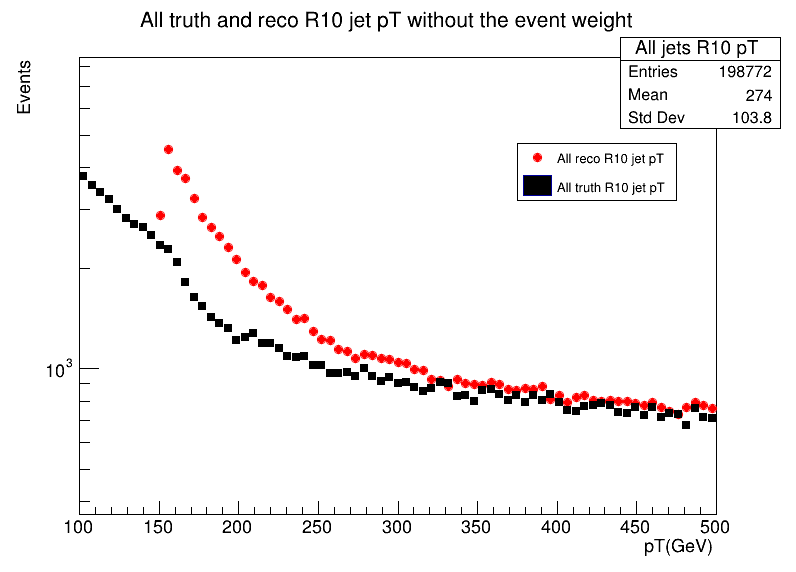

In [35]:
//Comparison between all truth R10 and reco R10 jets pT without consider the event weight
TLegend *leg9 = new TLegend(0.65, 0.65, 0.85, 0.75);

hist_recoR10_pt_wo_evtw->SetMarkerStyle(20);
hist_recoR10_pt_wo_evtw->SetMarkerColor(kRed);
hist_recoR10_pt_wo_evtw->SetFillStyle(1001);
hist_recoR10_pt_wo_evtw->SetFillColor(kRed);
hist_recoR10_pt_wo_evtw->SetTitle("All truth and reco R10 jet pT without the event weight");
hist_recoR10_pt_wo_evtw->Draw("P");
hist_truthR10_pt_wo_evtw->SetMarkerStyle(21);
hist_truthR10_pt_wo_evtw->SetMarkerColor(kBlack);
hist_truthR10_pt_wo_evtw->SetFillStyle(1003);
hist_truthR10_pt_wo_evtw->SetFillColor(kBlack);
hist_truthR10_pt_wo_evtw->Draw("sameP");
leg9->AddEntry(hist_recoR10_pt_wo_evtw, "All reco R10 jet pT", "p");
leg9->AddEntry(hist_truthR10_pt_wo_evtw, "All truth R10 jet pT", "f");
leg9->Draw();
canvas->SetLogy();
canvas->Draw();

### Comparison between all truth R10 and reco R10 jets pT considering event weight

In [36]:
TH1F *hist_recoR10_pt_evtw = new TH1F("All jet R10 pT evtw", "Reco R10 jet pT evtw; pT(GeV);Events",75,100,500);
TH1F *hist_truthR10_pt_evtw = new TH1F("All-jet R10 pT evtw", "Truth R10 jet pT evtw; pT(GeV);Events",75,100,500);

In [37]:
nentries = (Int_t)tree->GetEntries();
nbytes = 0;

for(int ii=0; ii<nentries; ii++)
{
    nbytes = (Int_t)tree->GetEntry(ii);
    if(reco_R10_pt->size()>0)
    {
        for(int jj=0; jj<reco_R10_pt->size(); jj++)
        {
            hist_recoR10_pt_evtw->Fill(reco_R10_pt->at(jj)/1000., evtw);
        }
    }
    
    if(truth_R10_pt->size()>0)
    {
        for(int jj=0; jj<truth_R10_pt->size(); jj++)
        {
            hist_truthR10_pt_evtw->Fill(truth_R10_pt->at(jj)/1000., evtw);
        }
    }
}

std::cout << "Done!" << endl;

Done!


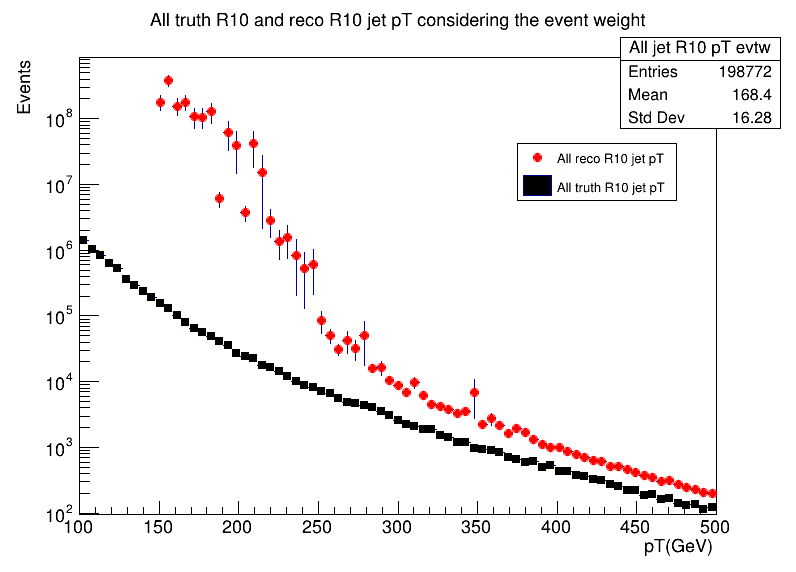

In [38]:
//Comparison between all truth R10 and reco R10 jet pT considering the event weight
TLegend *leg10 = new TLegend(0.65, 0.65, 0.85, 0.75);

hist_recoR10_pt_evtw->SetMarkerStyle(20);
hist_recoR10_pt_evtw->SetMarkerColor(kRed);
hist_recoR10_pt_evtw->SetFillStyle(1001);
hist_recoR10_pt_evtw->SetFillColor(kRed);
hist_recoR10_pt_evtw->SetTitle("All truth R10 and reco R10 jet pT considering the event weight");
hist_recoR10_pt_evtw->Draw("P");
hist_truthR10_pt_evtw->SetMarkerStyle(21);
hist_truthR10_pt_evtw->SetMarkerColor(kBlack);
hist_truthR10_pt_evtw->SetFillStyle(1003);
hist_truthR10_pt_evtw->SetFillColor(kBlack);
hist_truthR10_pt_evtw->Draw("sameP");
leg10->AddEntry(hist_recoR10_pt_evtw, "All reco R10 jet pT", "p");
leg10->AddEntry(hist_truthR10_pt_evtw, "All truth R10 jet pT", "f");
leg10->Draw();
canvas->SetLogy();
canvas->Draw();

### Comparison between all truth R10 Trimmed and reco R10 Trimmed jets pT without consider event weight 

In [39]:
TH1F *hist_recoR10_trimmed_pt_wo_evtw = new TH1F("All jets R10 Trimmed pT","Reco-Jet R10 Trimmed pT; pT(GeV);Events",75,100,500);
TH1F *hist_truthR10_trimmed_pt_wo_evtw = new TH1F("All-jets R10 Trimmed pT","Truth-Jet R10 Trimmed pT; pT(GeV);Events", 75, 100, 500);

In [40]:
nentries = (Int_t)tree->GetEntries();
nbytes = 0;

for (int ii=0; ii<nentries; ii++)
{
    nbytes = (Int_t)tree->GetEntry(ii);
    if(reco_R10_trimmed_pt->size()>0)
    {
        for(int jj=0; jj<reco_R10_trimmed_pt->size(); jj++)
        {
            hist_recoR10_trimmed_pt_wo_evtw->Fill(reco_R10_trimmed_pt->at(jj)/1000.);
        }
    }
    
    if(truth_R10_trimmed_pt->size()>0)
    {
        for(int jj=0; jj<truth_R10_trimmed_pt->size(); jj++)
        {
            hist_truthR10_trimmed_pt_wo_evtw->Fill(truth_R10_trimmed_pt->at(jj)/1000.);
        }
    }
}

std::cout << "Done!" << endl;

Done!


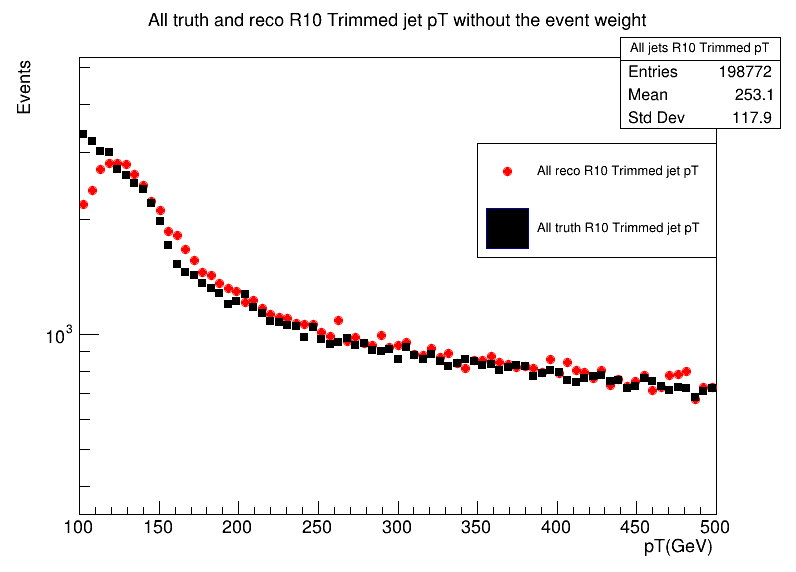

In [41]:
//Comparison between all truth R10 Trimmed and reco R10 Trimmed jets pT without consider the event weight
TLegend *leg11 = new TLegend(0.6, 0.55, 0.9, 0.75);

hist_recoR10_trimmed_pt_wo_evtw->SetMarkerStyle(20);
hist_recoR10_trimmed_pt_wo_evtw->SetMarkerColor(kRed);
hist_recoR10_trimmed_pt_wo_evtw->SetFillStyle(1001);
hist_recoR10_trimmed_pt_wo_evtw->SetFillColor(kRed);
hist_recoR10_trimmed_pt_wo_evtw->SetTitle("All truth and reco R10 Trimmed jet pT without the event weight");
hist_recoR10_trimmed_pt_wo_evtw->Draw("P");
hist_truthR10_trimmed_pt_wo_evtw->SetMarkerStyle(21);
hist_truthR10_trimmed_pt_wo_evtw->SetMarkerColor(kBlack);
hist_truthR10_trimmed_pt_wo_evtw->SetFillStyle(1003);
hist_truthR10_trimmed_pt_wo_evtw->SetFillColor(kBlack);
hist_truthR10_trimmed_pt_wo_evtw->Draw("sameP");
leg11->AddEntry(hist_recoR10_trimmed_pt_wo_evtw, "All reco R10 Trimmed jet pT", "p");
leg11->AddEntry(hist_truthR10_trimmed_pt_wo_evtw, "All truth R10 Trimmed jet pT", "f");
leg11->Draw();
canvas->SetLogy();
canvas->Draw();

### Comparison between all truth R10 Trimmed and reco R10 Trimmed jets pT considering event weight

In [42]:
TH1F *hist_recoR10_trimmed_pt_evtw = new TH1F("All jet R10 Trimmed pT evtw", "Reco R10 Trimmed jet pT evtw; pT(GeV);Events",75,100,500);
TH1F *hist_truthR10_trimmed_pt_evtw = new TH1F("All-jet R10 Trimmed pT evtw", "Truth R10 Trimmed jet pT evtw; pT(GeV);Events",75,100,500);

In [43]:
nentries = (Int_t)tree->GetEntries();
nbytes = 0;

for(int ii=0; ii<nentries; ii++)
{
    nbytes = (Int_t)tree->GetEntry(ii);
    if(reco_R10_trimmed_pt->size()>0)
    {
        for(int jj=0; jj<reco_R10_trimmed_pt->size(); jj++)
        {
            hist_recoR10_trimmed_pt_evtw->Fill(reco_R10_trimmed_pt->at(jj)/1000., evtw);
        }
    }
    
    if(truth_R10_trimmed_pt->size()>0)
    {
        for(int jj=0; jj<truth_R10_trimmed_pt->size(); jj++)
        {
            hist_truthR10_trimmed_pt_evtw->Fill(truth_R10_trimmed_pt->at(jj)/1000., evtw);
        }
    }
}

std::cout << "Done!" << endl;

Done!


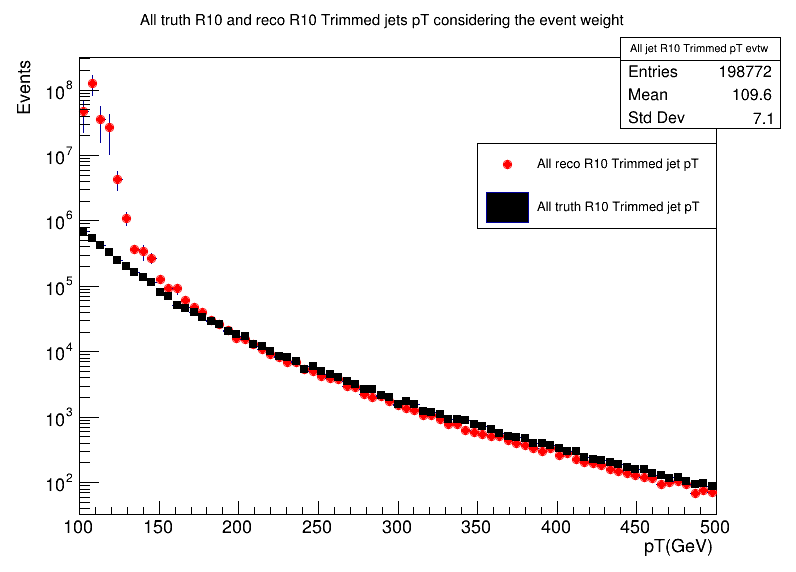

In [44]:
//Comparison between all truth R10 Trimmed and reco R10 Trimmed jet pT considering the event weight
TLegend *leg12 = new TLegend(0.6, 0.6, 0.9, 0.75);

hist_recoR10_trimmed_pt_evtw->SetMarkerStyle(20);
hist_recoR10_trimmed_pt_evtw->SetMarkerColor(kRed);
hist_recoR10_trimmed_pt_evtw->SetFillStyle(1001);
hist_recoR10_trimmed_pt_evtw->SetFillColor(kRed);
hist_recoR10_trimmed_pt_evtw->SetTitle("All truth R10 and reco R10 Trimmed jets pT considering the event weight");
hist_recoR10_trimmed_pt_evtw->Draw("P");
hist_truthR10_trimmed_pt_evtw->SetMarkerStyle(21);
hist_truthR10_trimmed_pt_evtw->SetMarkerColor(kBlack);
hist_truthR10_trimmed_pt_evtw->SetFillStyle(1003);
hist_truthR10_trimmed_pt_evtw->SetFillColor(kBlack);
hist_truthR10_trimmed_pt_evtw->Draw("sameP");
leg12->AddEntry(hist_recoR10_trimmed_pt_evtw, "All reco R10 Trimmed jet pT", "p");
leg12->AddEntry(hist_truthR10_trimmed_pt_evtw, "All truth R10 Trimmed jet pT", "f");
leg12->Draw();
canvas->SetLogy();
canvas->Draw();

# Excercise: 3. Make plots for reco and truth jet pT vs. pileup. Interpret your results.

Para estudiar la dependencia del pT de los jets con respecto al pileup extraemos la información del NPV (number of primary vertices) y del mu_average(number of average interactions per bunch-crossing):

In [45]:
TCanvas *canvas2 = new TCanvas("Canvas2","",800,600);

In [46]:
UInt_t npv = -1;
tree->SetBranchAddress("NPV", &npv);

float mu = -1;
tree->SetBranchAddress("mu_average", &mu);

### Using all reco and truth R4 Jets pT

Para ver el comportamiento del pT de los jets con respecto al pileup, podemos usar los jets R4 y jets R10. Primero comencemos con los jets R4. Así, definimos los histogramas:

In [47]:
TH2F *hist_recoR4_jet_pt_npv = new TH2F("NPV vs. R4 Jet pT",";NPV; Jet pT",70,0,70,300,0,300); //0-70 Range of NPV
TH2F *hist_truthR4_jet_pt_npv = new TH2F("NPV vs. R4-Jet pT",";NPV; Jet pT",70,0,70,300,0,300); //0-500 Range of Jet pT

In [48]:
TProfile *prof_recoR4_pt_npv = new TProfile("Profile RecoR4 Jet pT vs. NPV", ";NPV; Jet pT",70,0,70,0,200); 
TProfile *prof_truthR4_pt_npv = new TProfile("Profile TruthR4 Jet pT vs. NPV", ";NPV; Jet pT",70,0,70,0,200);

In [49]:
nentries = (Int_t)tree->GetEntries();
nbytes = 0;

for(int ii=0; ii<nentries; ii++)
{
    nbytes = tree->GetEntry(ii);
    
    if(reco_R4_pt->size()!=0 && reco_R4_pt->at(0)>20000.) //Se requiere que el Leading Jet pT > 20GeV
    {
        for(int jj=0; jj<reco_R4_pt->size(); jj++)
        {
            hist_recoR4_jet_pt_npv->Fill(npv, reco_R4_pt->at(jj)/1000., evtw);
            prof_recoR4_pt_npv->Fill(npv, reco_R4_pt->at(jj)/1000., evtw);
        }
    }
    
    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.)
    {
        for(int kk=0; kk<truth_R4_pt->size(); kk++)
        {
            hist_truthR4_jet_pt_npv->Fill(npv, truth_R4_pt->at(kk)/1000., evtw);
            prof_truthR4_pt_npv->Fill(npv, truth_R4_pt->at(kk)/1000., evtw);
        }
    }
}

std::cout << "Done!" << endl;

Done!


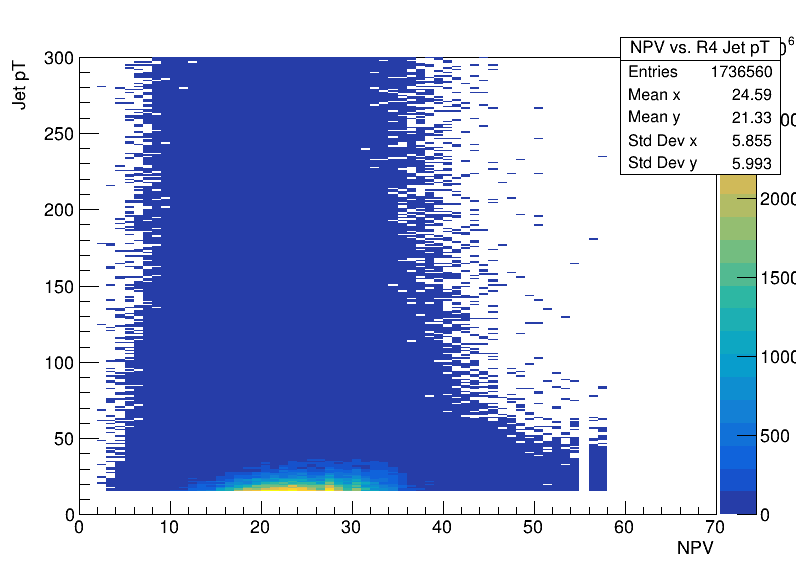

In [50]:
// Draw 2D histograms reco jet R4 pt vs pileup

hist_recoR4_jet_pt_npv->Draw("colz");
canvas2->Draw();

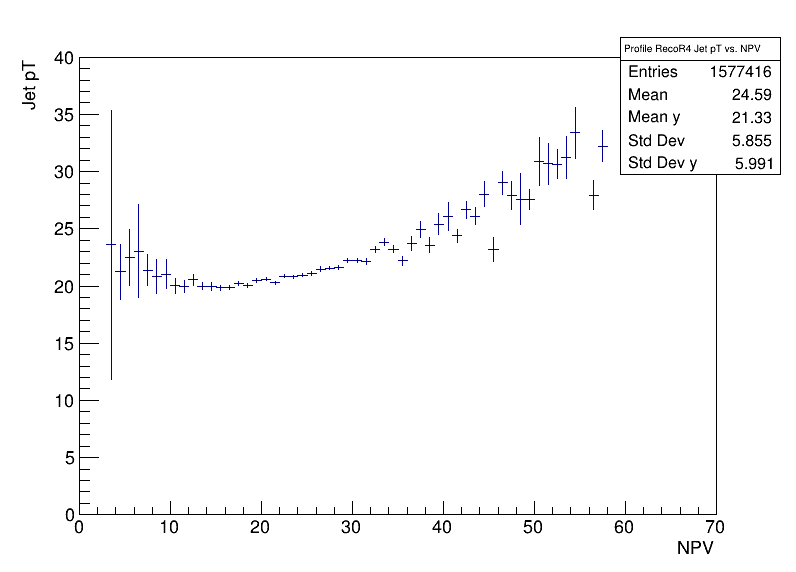

In [51]:
// Draw profile of reco jet R4 pt vs pileup

prof_recoR4_pt_npv->Draw("");
prof_recoR4_pt_npv->GetYaxis()->SetRangeUser(0, 40);
canvas2->Draw();

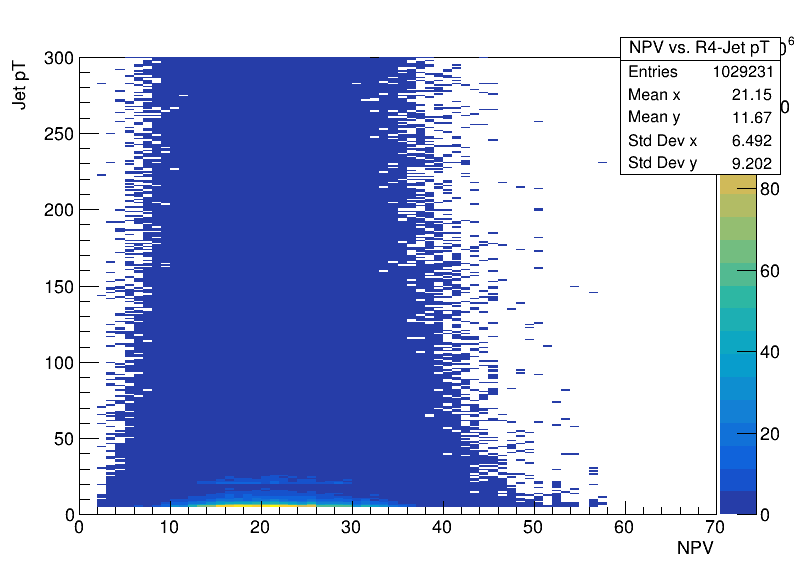

In [52]:
// Draw 2D histograms truth jet R4 pt vs pileup

hist_truthR4_jet_pt_npv->Draw("colz");
canvas2->Draw();

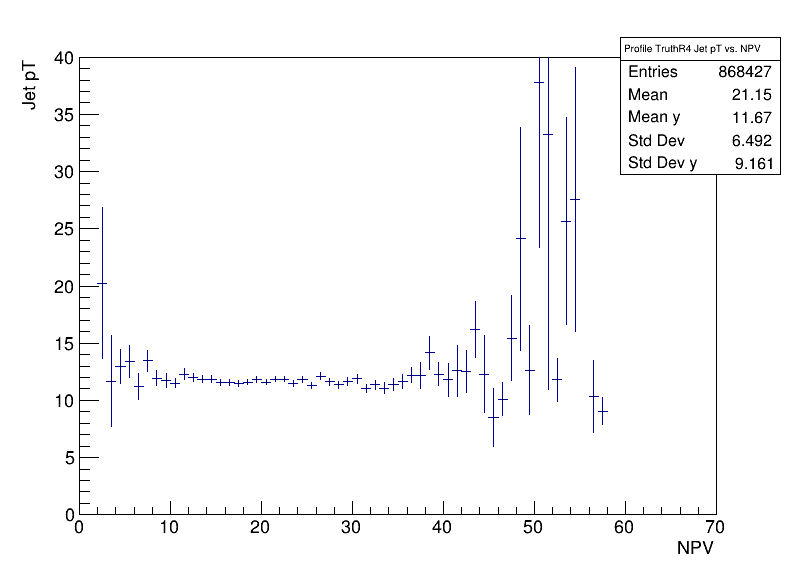

In [53]:
// Draw profile of truth jet R4 pt vs pileup

prof_truthR4_pt_npv->Draw("");
prof_truthR4_pt_npv->GetYaxis()->SetRangeUser(0, 40);
canvas2->Draw();

### Using all reco and truth R10 Jets pT

In [54]:
TH2F *hist_recoR10_jet_pt_npv = new TH2F("NPV vs. R10 Jet pT",";NPV; Jet pT",70,0,70,210,90,300); //0-70 Range of NPV
TH2F *hist_truthR10_jet_pt_npv = new TH2F("NPV vs. R10-Jet pT",";NPV; Jet pT",70,0,70,210,90,300); //90-300 Range of Jet pT

In [55]:
TProfile *prof_recoR10_pt_npv = new TProfile("Profile RecoR10 Jet pT vs. NPV", ";NPV; Jet pT",70,0,70,100,500); 
TProfile *prof_truthR10_pt_npv = new TProfile("Profile TruthR10 Jet pT vs. NPV", ";NPV; Jet pT",70,0,70,100,500);

In [56]:
nentries = (Int_t)tree->GetEntries();
nbytes = 0;

for(int ii=0; ii<nentries; ii++)
{
    nbytes = tree->GetEntry(ii);
    
    if(reco_R10_pt->size()!=0 && reco_R10_pt->at(0)>20000.) //Se requiere que el Leading Jet pT > 20GeV
    {
        for(int jj=0; jj<reco_R10_pt->size(); jj++)
        {
            hist_recoR10_jet_pt_npv->Fill(npv, reco_R10_pt->at(jj)/1000., evtw);
            prof_recoR10_pt_npv->Fill(npv, reco_R10_pt->at(jj)/1000., evtw);
        }
    }
    
    if(truth_R10_pt->size()!=0 && truth_R10_pt->at(0)>20000.)
    {
        for(int kk=0; kk<truth_R10_pt->size(); kk++)
        {
            hist_truthR10_jet_pt_npv->Fill(npv, truth_R10_pt->at(kk)/1000., evtw);
            prof_truthR10_pt_npv->Fill(npv, truth_R10_pt->at(kk)/1000., evtw);
        }
    }
}

std::cout << "Done!" << endl;

Done!


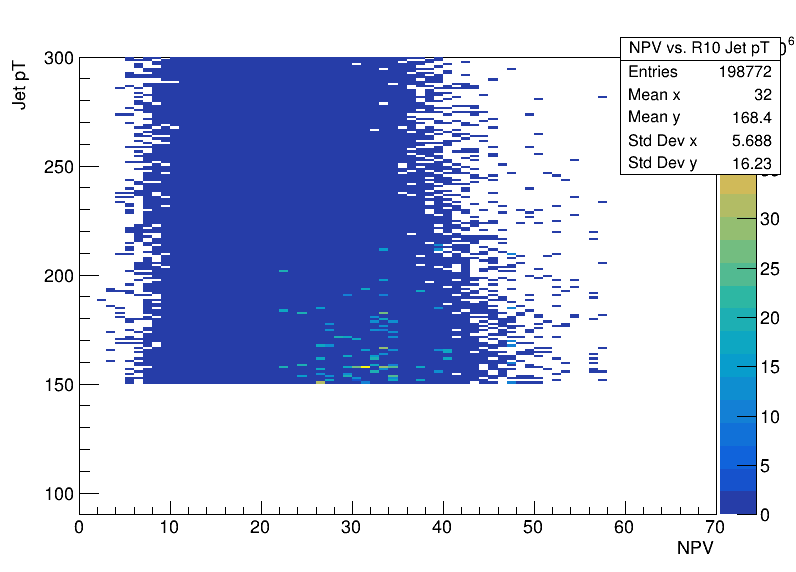

In [57]:
// Draw 2D histograms reco jet R10 pt vs pileup

hist_recoR10_jet_pt_npv->Draw("colz");
canvas2->Draw();

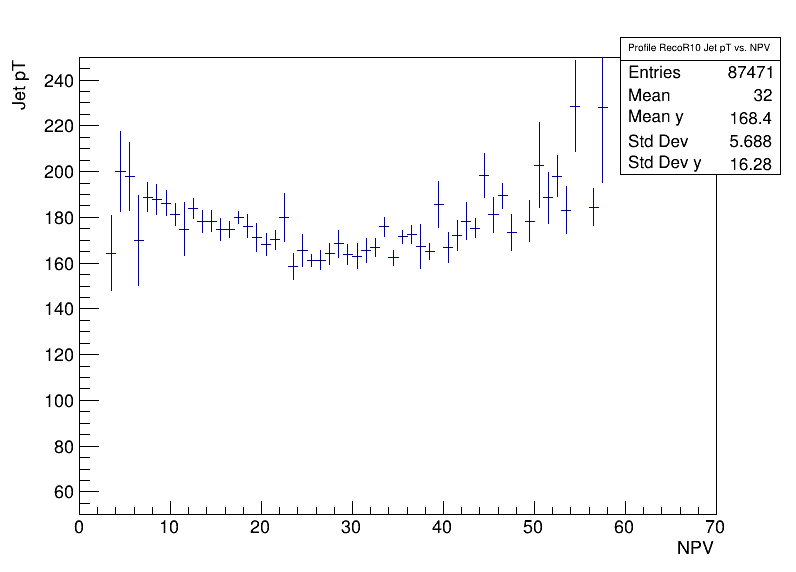

In [58]:
// Draw profile of reco jet R10 pt vs pileup

prof_recoR10_pt_npv->Draw("");
prof_recoR10_pt_npv->GetYaxis()->SetRangeUser(50, 250);
canvas2->Draw();

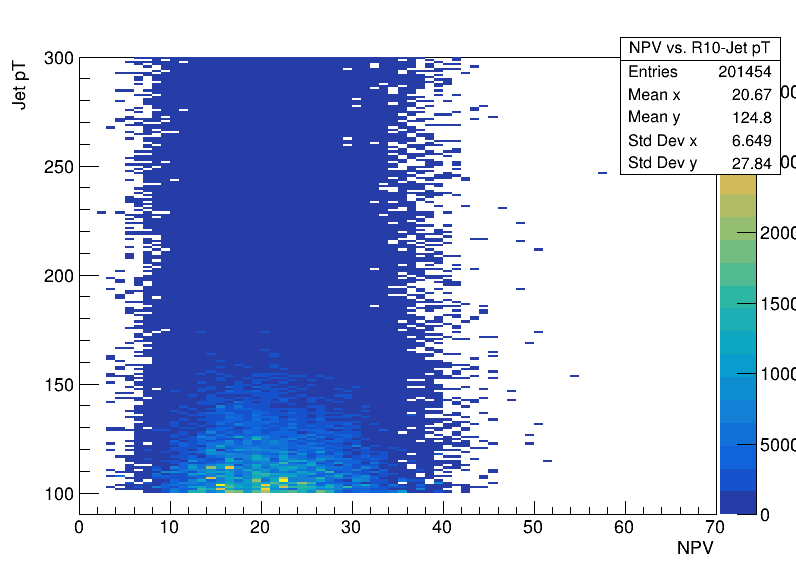

In [59]:
// Draw 2D histograms truth jet R10 pt vs pileup

hist_truthR10_jet_pt_npv->Draw("colz");
canvas2->Draw();

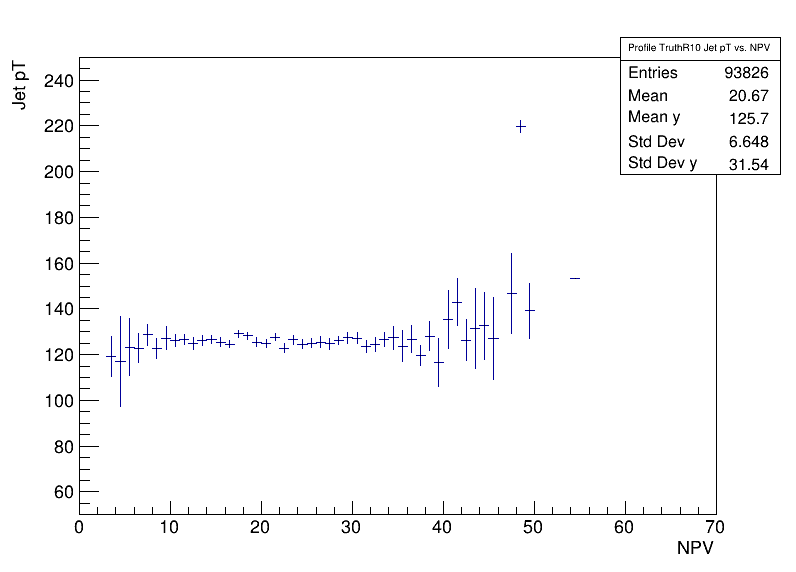

In [60]:
// Draw profile of truth jet R10 pt vs pileup

prof_truthR10_pt_npv->Draw("");
prof_truthR10_pt_npv->GetYaxis()->SetRangeUser(50, 250);
canvas2->Draw();

### Using all reco and truth R10 Trimmed Jets pT

In [61]:
TH2F *hist_recoR10_trimmed_jet_pt_npv = new TH2F("NPV vs. R10 Trimmed Jet pT",";NPV; Jet pT",70,0,70,290,10,300); //0-70 Range of NPV
TH2F *hist_truthR10_trimmed_jet_pt_npv = new TH2F("NPV vs. R10-Trimmed Jet pT",";NPV; Jet pT",70,0,70,290,10,300); //10-300 Range of Jet pT

In [62]:
TProfile *prof_recoR10_trimmed_pt_npv = new TProfile("Profile Reco R10 Trimmed Jet pT vs. NPV", ";NPV; Jet pT",70,0,70,100,500); 
TProfile *prof_truthR10_trimmed_pt_npv = new TProfile("Profile Truth R10 Trimmed Jet pT vs. NPV", ";NPV; Jet pT",70,0,70,100,500);

In [63]:
nentries = (Int_t)tree->GetEntries();
nbytes = 0;

for(int ii=0; ii<nentries; ii++)
{
    nbytes = tree->GetEntry(ii);
    
    if(reco_R10_trimmed_pt->size()!=0 && reco_R10_trimmed_pt->at(0)>20000.) //Se requiere que el Leading Jet pT > 20GeV
    {
        for(int jj=0; jj<reco_R10_trimmed_pt->size(); jj++)
        {
            hist_recoR10_trimmed_jet_pt_npv->Fill(npv, reco_R10_trimmed_pt->at(jj)/1000., evtw);
            prof_recoR10_trimmed_pt_npv->Fill(npv, reco_R10_trimmed_pt->at(jj)/1000., evtw);
        }
    }
    
    if(truth_R10_trimmed_pt->size()!=0 && truth_R10_trimmed_pt->at(0)>20000.)
    {
        for(int kk=0; kk<truth_R10_trimmed_pt->size(); kk++)
        {
            hist_truthR10_trimmed_jet_pt_npv->Fill(npv, truth_R10_trimmed_pt->at(kk)/1000., evtw);
            prof_truthR10_trimmed_pt_npv->Fill(npv, truth_R10_trimmed_pt->at(kk)/1000., evtw);
        }
    }
}

std::cout << "Done!" << endl;

Done!


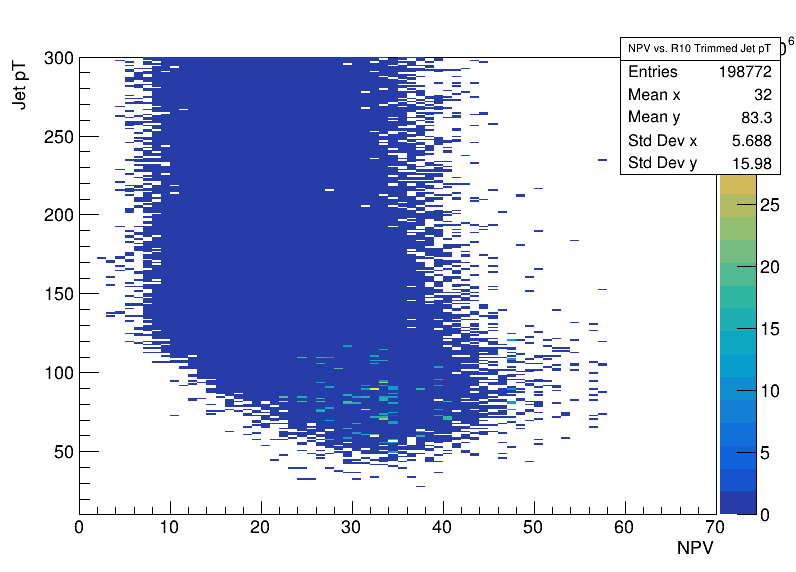

In [64]:
// Draw 2D histograms reco R10 Trimmed jet pt vs pileup

hist_recoR10_trimmed_jet_pt_npv->Draw("colz");
canvas2->Draw();

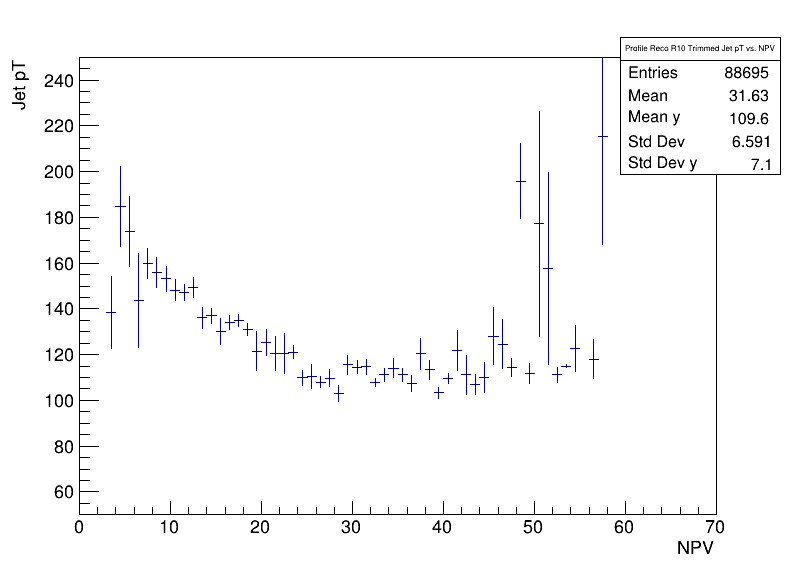

In [65]:
// Draw profile of reco R10 Trimmed jet pt vs pileup

prof_recoR10_trimmed_pt_npv->Draw("");
prof_recoR10_trimmed_pt_npv->GetYaxis()->SetRangeUser(50, 250);
canvas2->Draw();

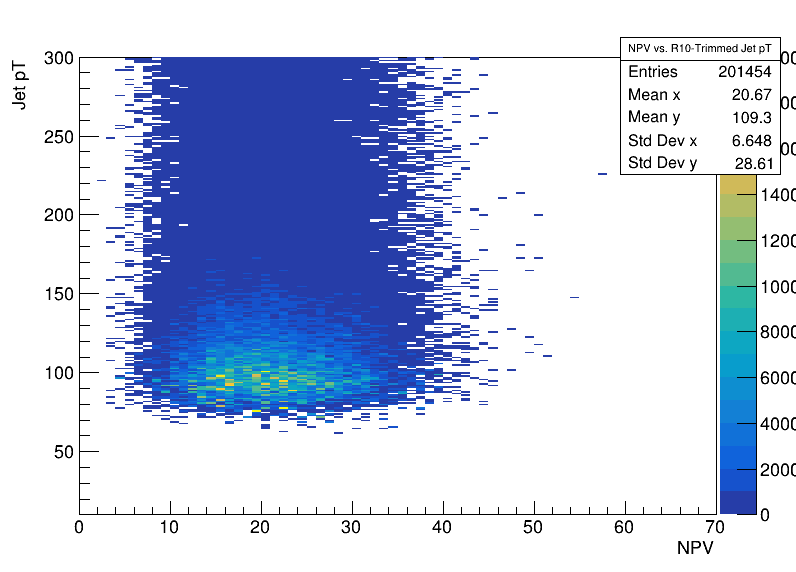

In [66]:
// Draw 2D histograms truth R10 Trimmed jet pt vs pileup

hist_truthR10_trimmed_jet_pt_npv->Draw("colz");
canvas2->Draw();

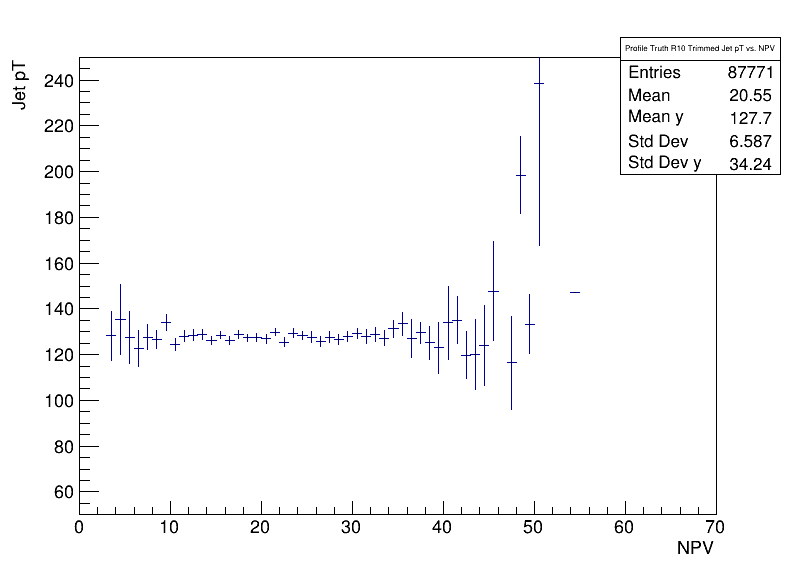

In [67]:
// Draw profile of truth R10 Trimmed jet pt vs pileup

prof_truthR10_trimmed_pt_npv->Draw("");
prof_truthR10_trimmed_pt_npv->GetYaxis()->SetRangeUser(50, 250);
canvas2->Draw();

Después de hacer las gráficas del Jet pT vs NPV para el reco R4 y truth R4 Jets, reco R10 y truth R10 Jets y reco R10 y truth R10 trimmed Jets, se evidencia que el pT de los jets es más estable siempre para el caso de los truth jets más que en el de los reco jets. Por lo tanto, el efecto del pileup es más notorio en los jets que están reconstruidos directamente de los calorimetros que aquellos que son reconstruidos directamente de las partículas (los truth jets). Ésto sucede debido a que el pileup ya es tenido en cuenta cuando se implementan los algoritmos para reconstruir los truth jets, mientras que los reco jets  son reconstruidos usando los depósitos de energía en los calorímetros y por lo tanto está presente mucho más el pileup. 

# Excercise: 4. Use a |JVF|>0.5 cut to compare the leading jet pT for truth jets, reco jets (w.o. the cut), and reco jets (with the cut)

### Using the R4 jets

Debido a que solamente los reco R4 jets tienen una variable JVF (Jet Vertex Fraction), entonces solamente se puede comparar los pT de los leading jets de los R4 Jets. El procedimiento sería similar para los truth R10, reco R10, truth R10 Trimmed y reco 10 Trimmed si se tuvieran las variables de JVF para los reco R10 jets y reco R10 Trimmed Jets. Por otro lado, no tiene sentido comparar los R10 Jets usando el JVF de los reco R4 Jets ya que los R10 Jets tienen un mayor pT y por lo tanto deben compararse separadamente de los R4 Jets. Así, creamos un nuevo canvas:

In [68]:
TCanvas *canvas3 = new TCanvas("Canvas3","",800,600);

In [69]:
vector<float> *reco_R4_jvf;

tree->SetBranchAddress("RecoJets_R4_jvf", &reco_R4_jvf);

In [70]:
TH1F *leadtruthR4_jetpt_comjvf = new TH1F("lead truth-reco R4 jets pT comp jvf",";Jet pT; Events",50, 10, 300);
TH1F *leadrecoR4_jetpt_comjvf_wo_jvfcut = new TH1F("lead-truth-reco R4 jets pT comp jvf",";Jet pT; Events",50, 10, 300);
TH1F *leadrecoR4_jetpt_comjvf_jvfcut = new TH1F("lead-truth-reco-R4 jets pT comp jvf",";Jet pT; Events",50, 10, 300);

In [71]:
// Comparison between the leading jet pT for truth R4 jets and reco R4 jets with and without the cut on |JVF|>0.5

nentries = (Int_t)tree->GetEntries();
nbytes = 0;

for(int ii=0; ii<nentries; ii++)
{
    nbytes = tree->GetEntry(ii);
    
    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.) 
    {
        leadtruthR4_jetpt_comjvf->Fill(truth_R4_pt->at(0)/1000., evtw);
    }    
    
    if(reco_R4_pt->size()!=0 && reco_R4_pt->at(0)>20000.) //without cut on |JVF|
    {
        leadrecoR4_jetpt_comjvf_wo_jvfcut->Fill(reco_R4_pt->at(0)/1000., evtw);
    }
    
    if(reco_R4_pt->size()!=0 && reco_R4_pt->at(0)>20000. && fabs(reco_R4_jvf->at(0))>0.5) //with the cut on |JVF|
    {
        leadrecoR4_jetpt_comjvf_jvfcut->Fill(reco_R4_pt->at(0)/1000., evtw);
    }


}

cout << "Done!" << endl;

Done!


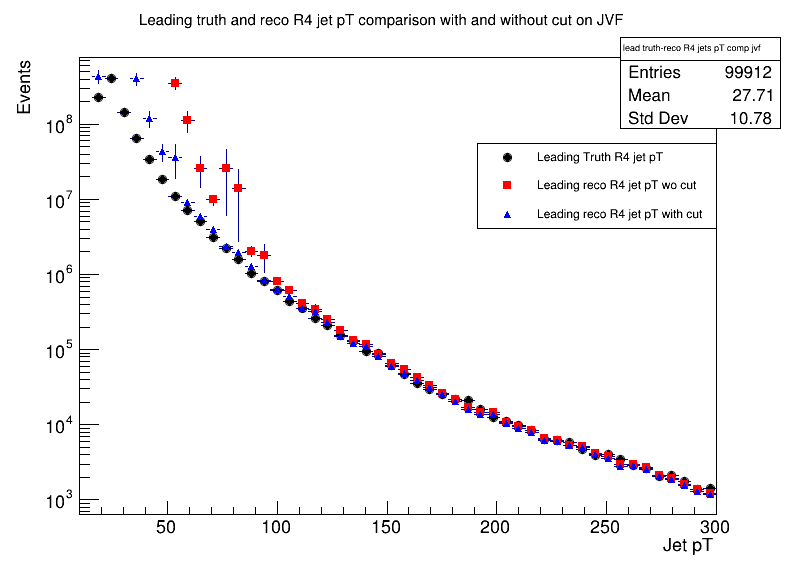

In [72]:
//Comparison between leading truth R4 and reco R4 jets pT (with and without the cut on |JVF|>0.5)
TLegend *leg13 = new TLegend(0.6, 0.6, 0.9, 0.75);

leadtruthR4_jetpt_comjvf->SetMarkerStyle(20);
leadtruthR4_jetpt_comjvf->SetMarkerColor(kBlack);
leadtruthR4_jetpt_comjvf->SetFillStyle(1001);
leadtruthR4_jetpt_comjvf->SetFillColor(kBlack);
leadtruthR4_jetpt_comjvf->SetTitle("Leading truth and reco R4 jet pT comparison with and without cut on JVF");
leadtruthR4_jetpt_comjvf->Draw("P");
leadrecoR4_jetpt_comjvf_wo_jvfcut->SetMarkerStyle(21);
leadrecoR4_jetpt_comjvf_wo_jvfcut->SetMarkerColor(kRed);
leadrecoR4_jetpt_comjvf_wo_jvfcut->SetFillStyle(1003);
leadrecoR4_jetpt_comjvf_wo_jvfcut->SetFillColor(kRed);
leadrecoR4_jetpt_comjvf_wo_jvfcut->Draw("sameP");
leadrecoR4_jetpt_comjvf_jvfcut->SetMarkerStyle(22);
leadrecoR4_jetpt_comjvf_jvfcut->SetMarkerColor(kBlue);
leadrecoR4_jetpt_comjvf_jvfcut->SetFillStyle(1003);
leadrecoR4_jetpt_comjvf_jvfcut->SetFillColor(kBlue);
leadrecoR4_jetpt_comjvf_jvfcut->Draw("sameP");
leg13->AddEntry(leadtruthR4_jetpt_comjvf, "Leading Truth R4 jet pT", "p");
leg13->AddEntry(leadrecoR4_jetpt_comjvf_wo_jvfcut, "Leading reco R4 jet pT wo cut", "p");
leg13->AddEntry(leadrecoR4_jetpt_comjvf_jvfcut, "Leading reco R4 jet pT with cut", "p");
leg13->Draw();
canvas3->SetLogy();
canvas3->Draw();

# Excercise 5: Repeat the same plots and comparisons with "Track-jets" and verify that they are stable against pileup 

In [73]:
TCanvas *canvas4 = new TCanvas("Canvas4","",800,600);

In [74]:
vector<float> *tracksjets_R4_pt;

tree->SetBranchAddress("TrackJets_R4_pt", &tracksjets_R4_pt);

In [75]:
TH2F *hist_tracksR4_jet_pt_npv = new TH2F("NPV vs. Tracks R4 Jet pT",";NPV; Jet pT",70,0,70,300,0,300); //0-70 Range of NPV
TProfile *prof_tracksR4_pt_npv = new TProfile("Profile Tracks R4 Jet pT vs. NPV", ";NPV; Jet pT",70,0,70,0,200); 

In [76]:
nentries = (Int_t)tree->GetEntries();
nbytes = 0;

for(int ii=0; ii<nentries; ii++)
{
    nbytes = tree->GetEntry(ii);
    
    if(tracksjets_R4_pt->size()!=0 && tracksjets_R4_pt->at(0)>20000.) //Se requiere que el Leading Jet pT > 20GeV
    {
        for(int jj=0; jj<tracksjets_R4_pt->size(); jj++)
        {
            hist_tracksR4_jet_pt_npv->Fill(npv, tracksjets_R4_pt->at(jj)/1000., evtw);
            prof_tracksR4_pt_npv->Fill(npv, tracksjets_R4_pt->at(jj)/1000., evtw);
        }
    }
}

std::cout << "Done!" << endl;

Done!


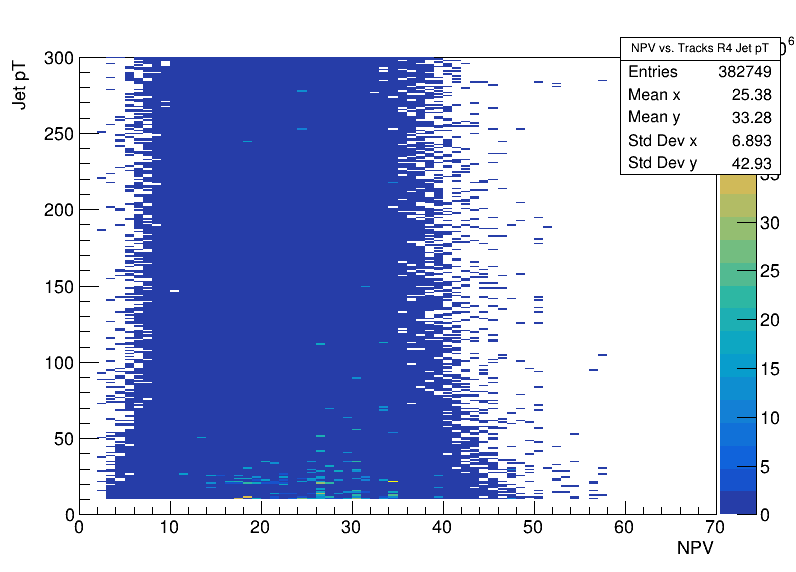

In [77]:
// Draw 2D histograms TrackJets R4 pt vs pileup

hist_tracksR4_jet_pt_npv->Draw("colz");
canvas4->Draw();

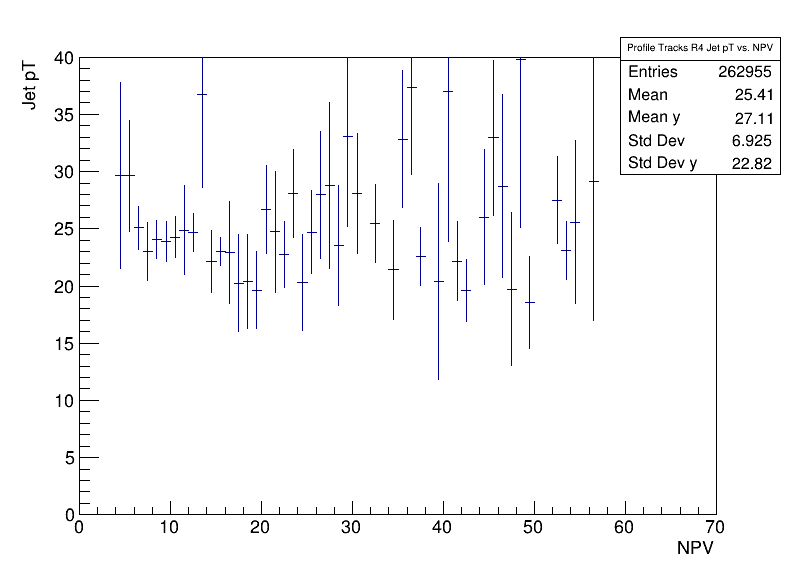

In [78]:
// Draw profile of Trackjets R4 pt vs pileup

prof_tracksR4_pt_npv->Draw("");
prof_tracksR4_pt_npv->GetYaxis()->SetRangeUser(0, 40);
canvas4->Draw();

# Excercise 6: Repeat for track-jets and make a plot comparing three cases: reco-jets with and without the JVF cut, and track-jets

In [79]:
TH1F *leadtracksR4_jetpt_comjvf = new TH1F("lead tracks-reco R4 jets pT comp jvf",";Jet pT; Events",50, 10, 300);
TH1F *leadrecoR4_jetpt_comjvf_wo_jvfcut_2 = new TH1F("lead-tracks-reco R4 jets pT comp jvf",";Jet pT; Events",50, 10, 300);
TH1F *leadrecoR4_jetpt_comjvf_jvfcut_2 = new TH1F("lead-tracks-reco-R4 jets pT comp jvf",";Jet pT; Events",50, 10, 300);

In [80]:
// Comparison between the leading jet pT for tracks R4 jets and reco R4 jets with and without the cut on |JVF|>0.5

nentries = (Int_t)tree->GetEntries();
nbytes = 0;

for(int ii=0; ii<nentries; ii++)
{
    nbytes = tree->GetEntry(ii);
    
    if(tracksjets_R4_pt->size()!=0 && tracksjets_R4_pt->at(0)>20000.) 
    {
        leadtracksR4_jetpt_comjvf->Fill(tracksjets_R4_pt->at(0)/1000., evtw);
    }    
    
    if(reco_R4_pt->size()!=0 && reco_R4_pt->at(0)>20000.) //without cut on |JVF|
    {
        leadrecoR4_jetpt_comjvf_wo_jvfcut_2->Fill(reco_R4_pt->at(0)/1000., evtw);
    }
    
    if(reco_R4_pt->size()!=0 && reco_R4_pt->at(0)>20000. && fabs(reco_R4_jvf->at(0))>0.5) //with the cut on |JVF|
    {
        leadrecoR4_jetpt_comjvf_jvfcut_2->Fill(reco_R4_pt->at(0)/1000., evtw);
    }


}

cout << "Done!" << endl;

Done!


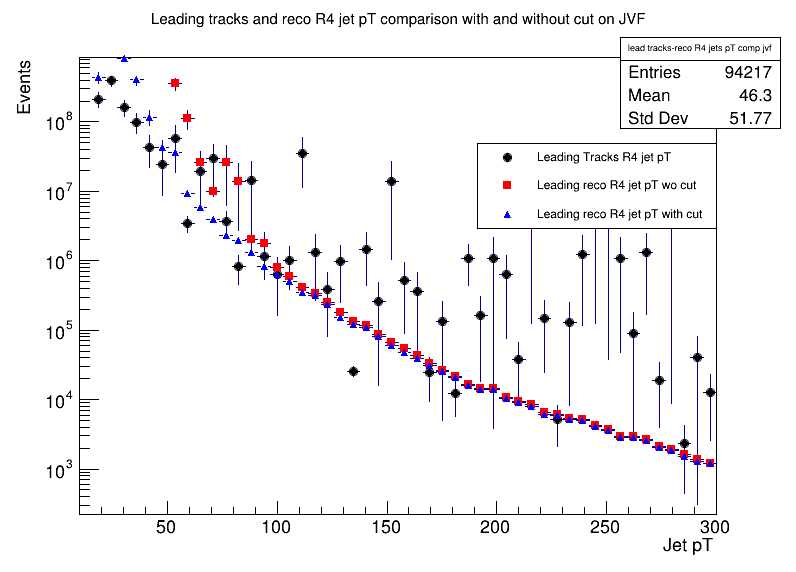

In [81]:
//Comparison between leading tracks R4 and reco R4 jets pT (with and without the cut on |JVF|>0.5)
TLegend *leg14 = new TLegend(0.6, 0.6, 0.9, 0.75);

leadtracksR4_jetpt_comjvf->SetMarkerStyle(20);
leadtracksR4_jetpt_comjvf->SetMarkerColor(kBlack);
leadtracksR4_jetpt_comjvf->SetFillStyle(1001);
leadtracksR4_jetpt_comjvf->SetFillColor(kBlack);
leadtracksR4_jetpt_comjvf->SetTitle("Leading tracks and reco R4 jet pT comparison with and without cut on JVF");
leadtracksR4_jetpt_comjvf->Draw("P");
leadrecoR4_jetpt_comjvf_wo_jvfcut_2->SetMarkerStyle(21);
leadrecoR4_jetpt_comjvf_wo_jvfcut_2->SetMarkerColor(kRed);
leadrecoR4_jetpt_comjvf_wo_jvfcut_2->SetFillStyle(1003);
leadrecoR4_jetpt_comjvf_wo_jvfcut_2->SetFillColor(kRed);
leadrecoR4_jetpt_comjvf_wo_jvfcut_2->Draw("sameP");
leadrecoR4_jetpt_comjvf_jvfcut_2->SetMarkerStyle(22);
leadrecoR4_jetpt_comjvf_jvfcut_2->SetMarkerColor(kBlue);
leadrecoR4_jetpt_comjvf_jvfcut_2->SetFillStyle(1003);
leadrecoR4_jetpt_comjvf_jvfcut_2->SetFillColor(kBlue);
leadrecoR4_jetpt_comjvf_jvfcut_2->Draw("sameP");
leg14->AddEntry(leadtracksR4_jetpt_comjvf, "Leading Tracks R4 jet pT", "p");
leg14->AddEntry(leadrecoR4_jetpt_comjvf_wo_jvfcut_2, "Leading reco R4 jet pT wo cut", "p");
leg14->AddEntry(leadrecoR4_jetpt_comjvf_jvfcut_2, "Leading reco R4 jet pT with cut", "p");
leg14->Draw();
canvas4->SetLogy();
canvas4->Draw();

In [82]:
TCanvas *canvas5 = new TCanvas("Canvas5","",800,600);

In [83]:
vector<float> *reco_R4_eta;
vector<float> *reco_R4_phi;
vector<float> *reco_R4_m;

vector<float> *truth_R4_eta;
vector<float> *truth_R4_phi;
vector<float> *truth_R4_m;

vector<float> *tracksjets_R4_eta;
vector<float> *tracksjets_R4_phi;
vector<float> *tracksjets_R4_m;

tree->SetBranchAddress("RecoJets_R4_eta", &reco_R4_eta);
tree->SetBranchAddress("RecoJets_R4_phi", &reco_R4_phi);
tree->SetBranchAddress("RecoJets_R4_m", &reco_R4_m);
tree->SetBranchAddress("TruthJets_R4_eta", &truth_R4_eta);
tree->SetBranchAddress("TruthJets_R4_phi", &truth_R4_phi);
tree->SetBranchAddress("TruthJets_R4_m", &truth_R4_m);
tree->SetBranchAddress("TrackJets_R4_eta", &tracksjets_R4_eta);
tree->SetBranchAddress("TrackJets_R4_phi", &tracksjets_R4_phi);
tree->SetBranchAddress("TrackJets_R4_m", &tracksjets_R4_m);

In [84]:
TH1F *hist_DR_reco_truth_20_jvf = new TH1F("Delta R reco and truth with JVF","Delta R between reco and truth jet with cut on JVF (pT>20GeV); #Delta R; Events",20,0,2);

In [85]:
nentries = (Int_t)tree->GetEntries();
nbytes = 0;

for (int ii=0; ii<nentries; ii++)
{
    nbytes = tree->GetEntry(ii);

    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){
    TLorentzVector truthJet;
    truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0));        
    if(reco_R4_pt->size()!=0 && fabs(reco_R4_jvf->at(0))>0.5){
    TLorentzVector recoJet;
    recoJet.SetPtEtaPhiM(reco_R4_pt->at(0),reco_R4_eta->at(0),reco_R4_phi->at(0),reco_R4_m->at(0));        
 
        //Plot the Delta R
        hist_DR_reco_truth_20_jvf->Fill(truthJet.DeltaR(recoJet),evtw);
    }
    }
      
}

std::cout << "Done!" << std::endl;

Done!


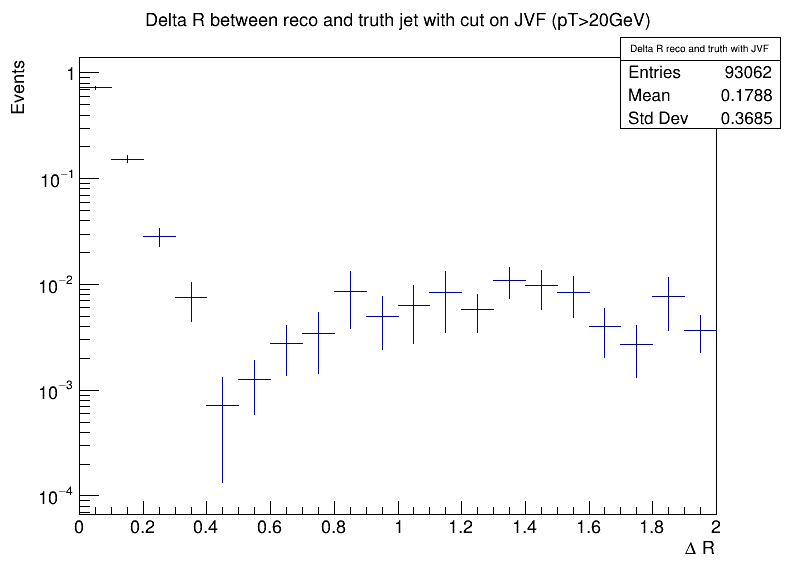

In [86]:
hist_DR_reco_truth_20_jvf->Scale(1/hist_DR_reco_truth_20_jvf->Integral());
hist_DR_reco_truth_20_jvf->Draw("P");

canvas5->SetLogy();
canvas5->Draw();

In [87]:
TCanvas *canvas6 = new TCanvas("Canvas6","",800,600);

In [88]:
TH1F *hist_DR_reco_truth_20 = new TH1F("Delta R reco and truth without JVF","Delta R between reco and truth jet without cut on JVF (pT>20GeV); #Delta R; Events",20,0,2);

In [89]:
nentries = (Int_t)tree->GetEntries();
nbytes = 0;

for (int ii=0; ii<nentries; ii++)
{
    nbytes = tree->GetEntry(ii);

    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){
    TLorentzVector truthJet;
    truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0));        
    if(reco_R4_pt->size()!=0){
    TLorentzVector recoJet;
    recoJet.SetPtEtaPhiM(reco_R4_pt->at(0),reco_R4_eta->at(0),reco_R4_phi->at(0),reco_R4_m->at(0));        
 
        //Plot the Delta R
        hist_DR_reco_truth_20->Fill(truthJet.DeltaR(recoJet),evtw);
    }
    }
      
}

std::cout << "Done!" << std::endl;

Done!


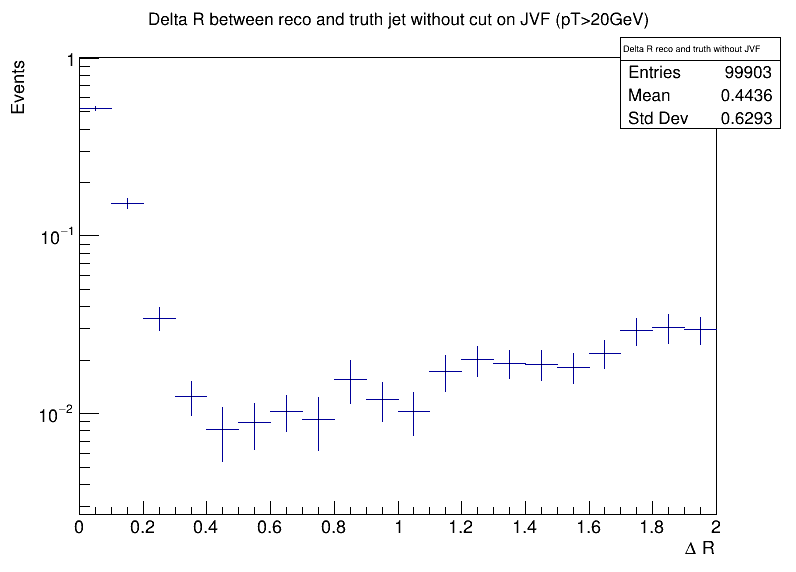

In [90]:
hist_DR_reco_truth_20->Scale(1/hist_DR_reco_truth_20->Integral());
hist_DR_reco_truth_20->Draw("P");

canvas6->SetLogy();
canvas6->Draw();

In [91]:
TCanvas *canvas7 = new TCanvas("Canvas7","",800,600);

In [93]:
TH1F *hist_DR_track_truth_20 = new TH1F("Delta R track and truth Jets","Delta R between track and truth jets (pT>20GeV); #Delta R; Events",20,0,2);

In [94]:
nentries = (Int_t)tree->GetEntries();
nbytes = 0;

for (int ii=0; ii<nentries; ii++)
{
    nbytes = tree->GetEntry(ii);

    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){
    TLorentzVector truthJet;
    truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0));        
    if(tracksjets_R4_pt->size()!=0){
    TLorentzVector trackJet;
    trackJet.SetPtEtaPhiM(tracksjets_R4_pt->at(0),tracksjets_R4_eta->at(0),tracksjets_R4_phi->at(0),tracksjets_R4_m->at(0));        
 
        //Plot the Delta R
        hist_DR_track_truth_20->Fill(truthJet.DeltaR(trackJet),evtw);
    }
    }
      
}

std::cout << "Done!" << std::endl;

Done!


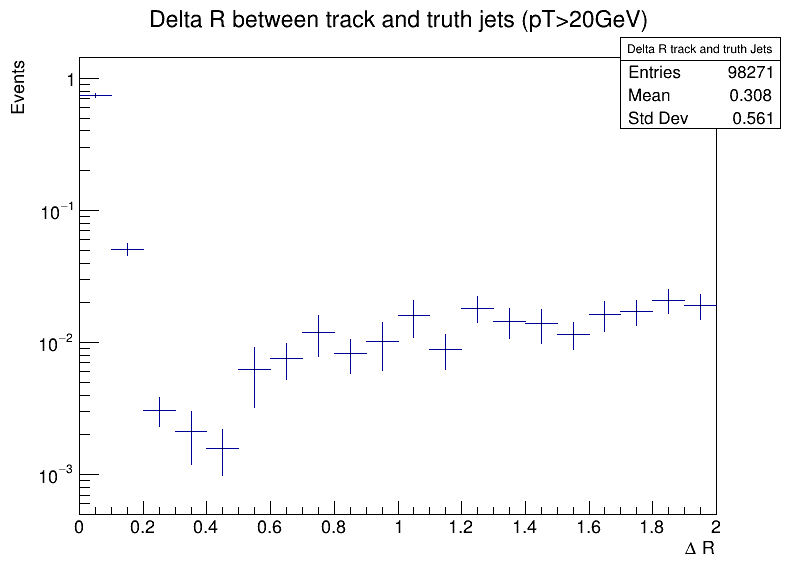

In [95]:
hist_DR_track_truth_20->Scale(1/hist_DR_track_truth_20->Integral());
hist_DR_track_truth_20->Draw("P");

canvas7->SetLogy();
canvas7->Draw();

# Excercise 7: Plot the response: For matched jets (use DeltaR<0.3), plot pTjet/pTtruth for 3 cases: truth_pT>20 GeV, 100 GeV, 500 GeV. Do this for track jets and reco jets (two plots).

### Match of reco and truth jets with the cut on |JVF|>0.5

In [96]:
TCanvas *canvas8 = new TCanvas("Canvas8","",800,600);

In [97]:
TH1F *hist_fractionpt20_reco_truth_jvf = new TH1F("Fraction pt reco truth JVF","; pTJet/pTTruthJet; Events",20,0,4);
TH1F *hist_fractionpt100_reco_truth_jvf = new TH1F("Fraction pt-reco truth JVF","; pTJet/pTTruthJet; Events",20,0,4);
TH1F *hist_fractionpt500_reco_truth_jvf = new TH1F("Fraction pt-reco-truth JVF","; pTJet/pTTruthJet; Events",20,0,4);

In [98]:
nentries = (Int_t)tree->GetEntries();
nbytes = 0;

for (int ii=0; ii<nentries; ii++)
{
    nbytes = tree->GetEntry(ii);

    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){
    TLorentzVector truthJet;
    truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0));        
    if(reco_R4_pt->size()!=0 && fabs(reco_R4_jvf->at(0))>0.5){
    TLorentzVector recoJet;
    recoJet.SetPtEtaPhiM(reco_R4_pt->at(0),reco_R4_eta->at(0),reco_R4_phi->at(0),reco_R4_m->at(0));        
        if(truthJet.DeltaR(recoJet)<0.3){
            hist_fractionpt20_reco_truth_jvf->Fill(reco_R4_pt->at(0)/truth_R4_pt->at(0), evtw);
        }
    }
    }
    
    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>100000.){
    TLorentzVector truthJet;
    truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0));        
    if(reco_R4_pt->size()!=0 && fabs(reco_R4_jvf->at(0))>0.5){
    TLorentzVector recoJet;
    recoJet.SetPtEtaPhiM(reco_R4_pt->at(0),reco_R4_eta->at(0),reco_R4_phi->at(0),reco_R4_m->at(0));        
        if(truthJet.DeltaR(recoJet)<0.3){
            hist_fractionpt100_reco_truth_jvf->Fill(reco_R4_pt->at(0)/truth_R4_pt->at(0), evtw);
        }
    }
    }
    
    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>500000.){
    TLorentzVector truthJet;
    truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0));        
    if(reco_R4_pt->size()!=0 && fabs(reco_R4_jvf->at(0))>0.5){
    TLorentzVector recoJet;
    recoJet.SetPtEtaPhiM(reco_R4_pt->at(0),reco_R4_eta->at(0),reco_R4_phi->at(0),reco_R4_m->at(0));        
        if(truthJet.DeltaR(recoJet)<0.3){
            hist_fractionpt500_reco_truth_jvf->Fill(reco_R4_pt->at(0)/truth_R4_pt->at(0), evtw);
        }
    }
    }
    
}

std::cout << "Done!" << std::endl;

Done!


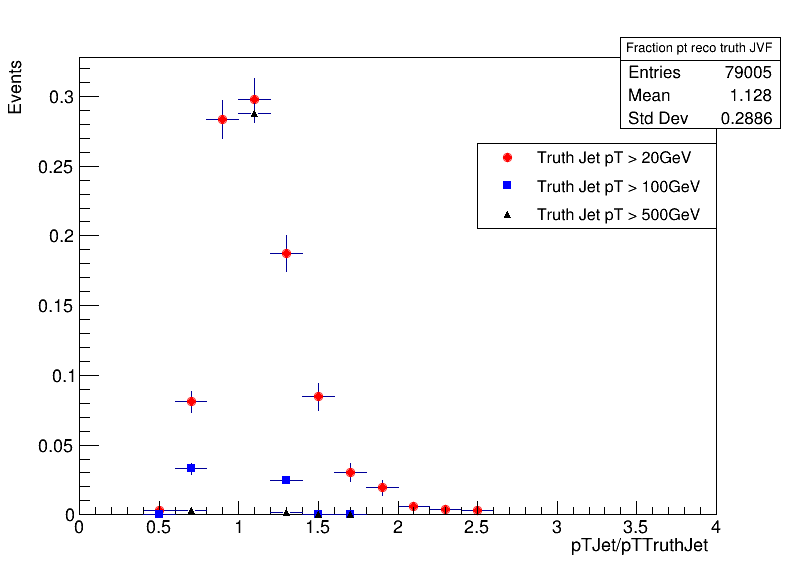

In [99]:
hist_fractionpt20_reco_truth_jvf->SetMarkerStyle(20);
hist_fractionpt20_reco_truth_jvf->SetMarkerColor(kRed);
hist_fractionpt20_reco_truth_jvf->DrawNormalized("P");
hist_fractionpt100_reco_truth_jvf->SetMarkerStyle(21);
hist_fractionpt100_reco_truth_jvf->SetMarkerColor(kBlue);
hist_fractionpt100_reco_truth_jvf->DrawNormalized("sameP");
hist_fractionpt500_reco_truth_jvf->SetMarkerStyle(22);
hist_fractionpt500_reco_truth_jvf->SetMarkerColor(kBlack);
hist_fractionpt500_reco_truth_jvf->DrawNormalized("sameP");

TLegend *leg15 = new TLegend(0.6, 0.6, 0.9, 0.75);

leg15->AddEntry(hist_fractionpt20_reco_truth_jvf, "Truth Jet pT > 20GeV", "p");
leg15->AddEntry(hist_fractionpt100_reco_truth_jvf, "Truth Jet pT > 100GeV", "p");
leg15->AddEntry(hist_fractionpt500_reco_truth_jvf, "Truth Jet pT > 500GeV", "p");
leg15->Draw();

canvas8->Draw();

### Match of track and truth jets

In [100]:
TCanvas *canvas9 = new TCanvas("Canvas9","",800,600);

In [101]:
TH1F *hist_fractionpt20_track_truth = new TH1F("Fraction pt track truth","; pTJet/pTTruthJet; Events",20,0,4);
TH1F *hist_fractionpt100_track_truth = new TH1F("Fraction pt-track truth","; pTJet/pTTruthJet; Events",20,0,4);
TH1F *hist_fractionpt500_track_truth = new TH1F("Fraction pt-track-truth","; pTJet/pTTruthJet; Events",20,0,4);

In [102]:
nentries = (Int_t)tree->GetEntries();
nbytes = 0;

for (int ii=0; ii<nentries; ii++)
{
    nbytes = tree->GetEntry(ii);

    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){
    TLorentzVector truthJet;
    truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0));        
    if(tracksjets_R4_pt->size()!=0){
    TLorentzVector trackJet;
    trackJet.SetPtEtaPhiM(tracksjets_R4_pt->at(0),tracksjets_R4_eta->at(0),tracksjets_R4_phi->at(0),tracksjets_R4_m->at(0));        
        if(truthJet.DeltaR(trackJet)<0.3){
            hist_fractionpt20_track_truth->Fill(tracksjets_R4_pt->at(0)/truth_R4_pt->at(0), evtw);
        }
    }
    }
    
    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>100000.){
    TLorentzVector truthJet;
    truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0));        
    if(tracksjets_R4_pt->size()!=0){
    TLorentzVector trackJet;
    trackJet.SetPtEtaPhiM(tracksjets_R4_pt->at(0),tracksjets_R4_eta->at(0),tracksjets_R4_phi->at(0),tracksjets_R4_m->at(0));        
        if(truthJet.DeltaR(trackJet)<0.3){
            hist_fractionpt100_track_truth->Fill(tracksjets_R4_pt->at(0)/truth_R4_pt->at(0), evtw);
        }
    }
    }
    
    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>500000.){
    TLorentzVector truthJet;
    truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0));        
    if(tracksjets_R4_pt->size()!=0){
    TLorentzVector trackJet;
    trackJet.SetPtEtaPhiM(tracksjets_R4_pt->at(0),tracksjets_R4_eta->at(0),tracksjets_R4_phi->at(0),tracksjets_R4_m->at(0));        
        if(truthJet.DeltaR(trackJet)<0.3){
            hist_fractionpt500_track_truth->Fill(tracksjets_R4_pt->at(0)/truth_R4_pt->at(0), evtw);
        }
    }
    }
    
}

std::cout << "Done!" << std::endl;

Done!


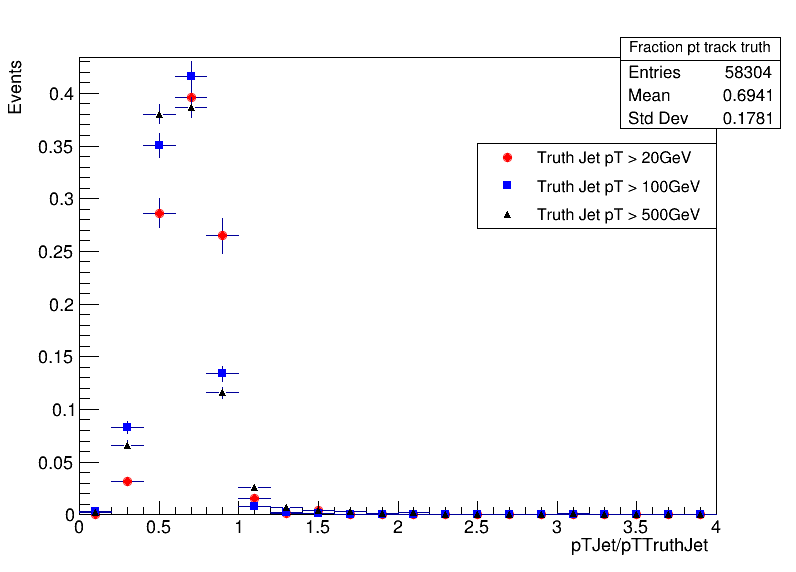

In [103]:
hist_fractionpt20_track_truth->SetMarkerStyle(20);
hist_fractionpt20_track_truth->SetMarkerColor(kRed);
hist_fractionpt20_track_truth->DrawNormalized("P");
hist_fractionpt100_track_truth->SetMarkerStyle(21);
hist_fractionpt100_track_truth->SetMarkerColor(kBlue);
hist_fractionpt100_track_truth->DrawNormalized("sameP");
hist_fractionpt500_track_truth->SetMarkerStyle(22);
hist_fractionpt500_track_truth->SetMarkerColor(kBlack);
hist_fractionpt500_track_truth->DrawNormalized("sameP");

TLegend *leg16 = new TLegend(0.6, 0.6, 0.9, 0.75);

leg16->AddEntry(hist_fractionpt20_track_truth, "Truth Jet pT > 20GeV", "p");
leg16->AddEntry(hist_fractionpt100_track_truth, "Truth Jet pT > 100GeV", "p");
leg16->AddEntry(hist_fractionpt500_track_truth, "Truth Jet pT > 500GeV", "p");
leg16->Draw();

canvas9->Draw();

# Excersice 8: Investigate the Large-R jets: (a) Plot the leading jet pT for reco_R10 and reco_R10_Trimmed jets (b) Plot the leading jet pT for truth_R10 and truth_R10_Trimmed jets (c) Compare all plots. How can you explain the differences? (d) Make the same comparisson for the jet mass.

### (a) Plot the leading jet pT for reco_R10 and reco_R10_Trimmed jets 

In [104]:
TCanvas *canvas10 = new TCanvas("Canvas10","",800,600);

In [105]:
TH1F *hist_leadrecoR10_jets = new TH1F("Leading reco and reco trimmed R10 pT", "Leading reco and reco trimmed R10 Jets pT; Jets pT; Events", 75, 100, 500);
TH1F *hist_leadrecotrimmedR10_jets = new TH1F("Leading-reco and reco trimmed R10 pT", "Leading reco and reco trimmed R10 Jets pT; Jets pT; Events", 75, 100, 500);

In [106]:
nentries = (Int_t)tree->GetEntries();
nbytes = 0;

for (int ii=0; ii<nentries; ii++)
{
    nbytes = tree->GetEntry(ii);   
    if(reco_R10_pt->size()>0){
    hist_leadrecoR10_jets->Fill(reco_R10_pt->at(0)/1000., evtw); 
    }
    
    if(reco_R10_trimmed_pt->size()>0){
    hist_leadrecotrimmedR10_jets->Fill(reco_R10_trimmed_pt->at(0)/1000., evtw);  
    }
}

std::cout << "Done!" << std::endl;

Done!


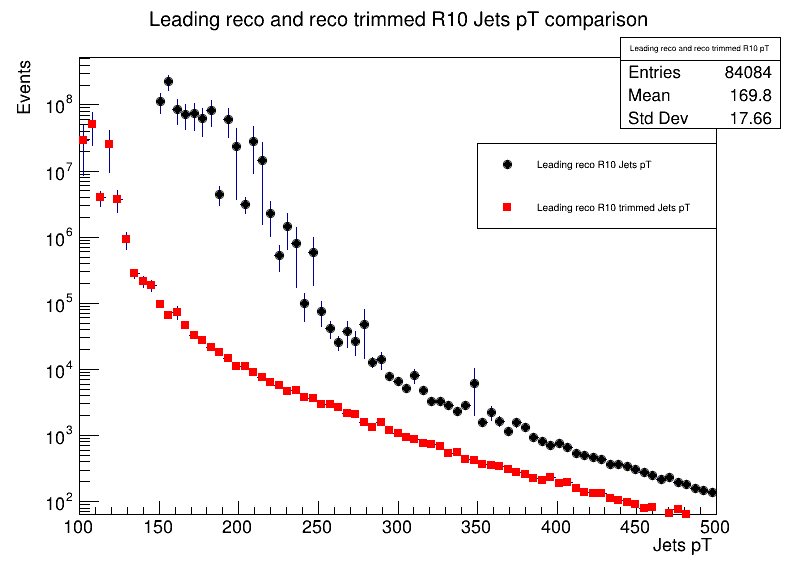

In [107]:
TLegend *leg17 = new TLegend(0.6, 0.6, 0.9, 0.75);

hist_leadrecoR10_jets->SetMarkerStyle(20);
hist_leadrecoR10_jets->SetMarkerColor(kBlack);
hist_leadrecoR10_jets->SetFillStyle(1001);
hist_leadrecoR10_jets->SetFillColor(kBlack);
hist_leadrecoR10_jets->SetTitle("Leading reco and reco trimmed R10 Jets pT comparison");
hist_leadrecoR10_jets->Draw("P");
hist_leadrecotrimmedR10_jets->SetMarkerStyle(21);
hist_leadrecotrimmedR10_jets->SetMarkerColor(kRed);
hist_leadrecotrimmedR10_jets->SetFillStyle(1003);
hist_leadrecotrimmedR10_jets->SetFillColor(kRed);
hist_leadrecotrimmedR10_jets->Draw("sameP");

leg17->AddEntry(hist_leadrecoR10_jets, "Leading reco R10 Jets pT", "p");
leg17->AddEntry(hist_leadrecotrimmedR10_jets, "Leading reco R10 trimmed Jets pT", "p");
leg17->Draw();
canvas10->SetLogy();
canvas10->Draw();

### (b) Plot the leading jet pT for truth_R10 and truth_R10_Trimmed jets

In [108]:
TH1F *hist_leadtruthR10_jets = new TH1F("Leading truth and truth trimmed R10 pT", "Leading truth and truth trimmed R10 Jets pT; Jets pT; Events", 75, 100, 500);
TH1F *hist_leadtruthtrimmedR10_jets = new TH1F("Leading-truth and truth trimmed R10 pT", "Leading truth and truth trimmed R10 Jets pT; Jets pT; Events", 75, 100, 500);

In [109]:
nentries = (Int_t)tree->GetEntries();
nbytes = 0;

for (int ii=0; ii<nentries; ii++)
{
    nbytes = tree->GetEntry(ii);   
    if(truth_R10_pt->size()>0){
    hist_leadtruthR10_jets->Fill(truth_R10_pt->at(0)/1000., evtw); 
    }
    
    if(truth_R10_trimmed_pt->size()>0){
    hist_leadtruthtrimmedR10_jets->Fill(truth_R10_trimmed_pt->at(0)/1000., evtw);  
    }
}

std::cout << "Done!" << std::endl;

Done!


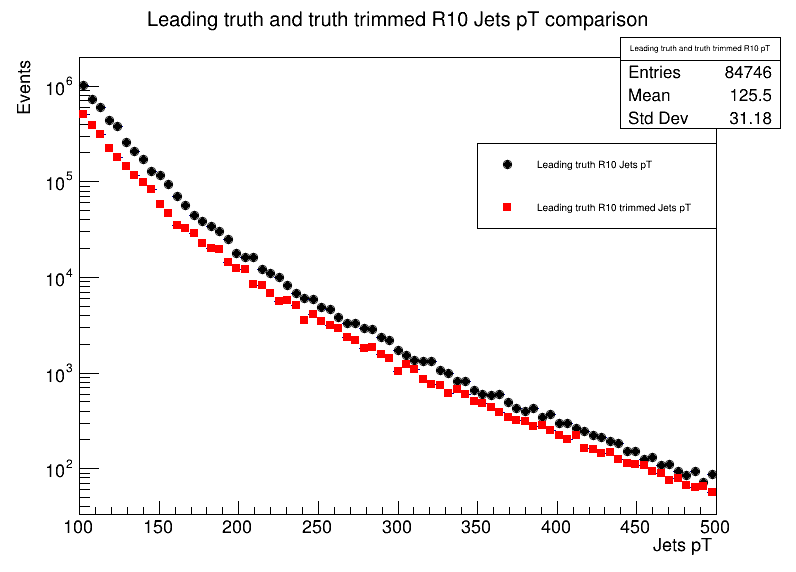

In [110]:
TLegend *leg18 = new TLegend(0.6, 0.6, 0.9, 0.75);

hist_leadtruthR10_jets->SetMarkerStyle(20);
hist_leadtruthR10_jets->SetMarkerColor(kBlack);
hist_leadtruthR10_jets->SetFillStyle(1001);
hist_leadtruthR10_jets->SetFillColor(kBlack);
hist_leadtruthR10_jets->SetTitle("Leading truth and truth trimmed R10 Jets pT comparison");
hist_leadtruthR10_jets->Draw("P");
hist_leadtruthtrimmedR10_jets->SetMarkerStyle(21);
hist_leadtruthtrimmedR10_jets->SetMarkerColor(kRed);
hist_leadtruthtrimmedR10_jets->SetFillStyle(1003);
hist_leadtruthtrimmedR10_jets->SetFillColor(kRed);
hist_leadtruthtrimmedR10_jets->Draw("sameP");

leg18->AddEntry(hist_leadtruthR10_jets, "Leading truth R10 Jets pT", "p");
leg18->AddEntry(hist_leadtruthtrimmedR10_jets, "Leading truth R10 trimmed Jets pT", "p");
leg18->Draw();
canvas10->SetLogy();
canvas10->Draw();

### (c) Compare all plots. How can you explain the differences?

En las dos gráficas anteriores podemos observar que en el caso de los truth jets y los truth trimmed jets pT, éstos son más cercanos mientras que en el caso de los reco jets y reco trimmed jets las distribuciones están más alejadas. Ésto puede explicarse ya que los reco jets son reconstruidos a partir de los depósitos de energía y pT en los calorímetros, mientras que los truth jets son obtenidos de la trayectoria de la partícula y por lo tanto es más precisa que en el caso de los reco jets.

### (d) Make the same comparison for the jet mass.

In [111]:
vector<float> *reco_R10_m;
vector<float> *reco_R10_trimmed_m;
vector<float> *truth_R10_m;
vector<float> *truth_R10_trimmed_m;

tree->SetBranchAddress("RecoJets_R10_m", &reco_R10_m);
tree->SetBranchAddress("RecoJets_R10_Trimmed_m", &reco_R10_trimmed_m);
tree->SetBranchAddress("TruthJets_R10_m", &truth_R10_m);
tree->SetBranchAddress("TruthJets_R10_Trimmed_m", &truth_R10_trimmed_m);

In [112]:
TCanvas *canvas11 = new TCanvas("Canvas11","",800,600);

In [113]:
TH1F *hist_leadrecoR10_jets_m = new TH1F("Leading reco and reco trimmed R10 m", "Leading reco and reco trimmed R10 Jets m; Jets pT; Events", 75, 100, 500);
TH1F *hist_leadrecotrimmedR10_jets_m = new TH1F("Leading-reco and reco trimmed R10 m", "Leading reco and reco trimmed R10 Jets m; Jets pT; Events", 75, 100, 500);

In [114]:
nentries = (Int_t)tree->GetEntries();
nbytes = 0;

for (int ii=0; ii<nentries; ii++)
{
    nbytes = tree->GetEntry(ii);   
    if(reco_R10_m->size()>0){
    hist_leadrecoR10_jets_m->Fill(reco_R10_m->at(0)/1000., evtw); 
    }
    
    if(reco_R10_trimmed_m->size()>0){
    hist_leadrecotrimmedR10_jets_m->Fill(reco_R10_trimmed_m->at(0)/1000., evtw);  
    }
}

std::cout << "Done!" << std::endl;

Done!


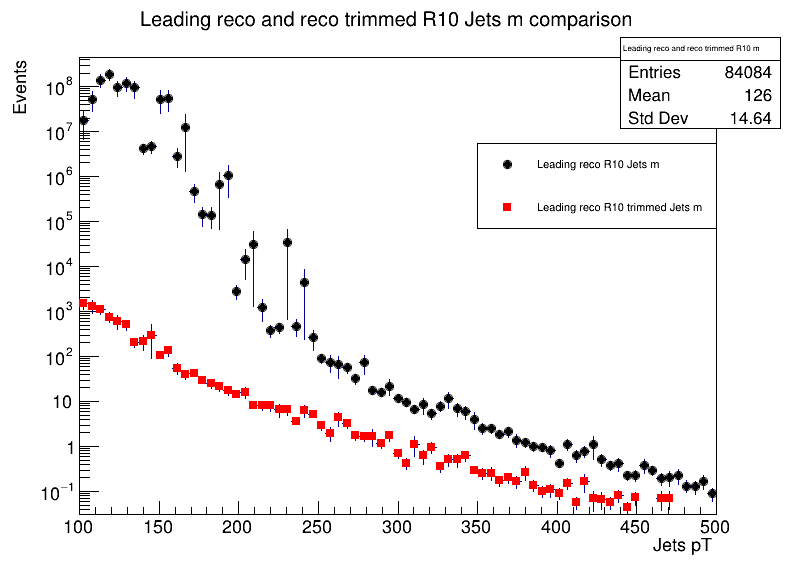

In [115]:
TLegend *leg19 = new TLegend(0.6, 0.6, 0.9, 0.75);

hist_leadrecoR10_jets_m->SetMarkerStyle(20);
hist_leadrecoR10_jets_m->SetMarkerColor(kBlack);
hist_leadrecoR10_jets_m->SetFillStyle(1001);
hist_leadrecoR10_jets_m->SetFillColor(kBlack);
hist_leadrecoR10_jets_m->SetTitle("Leading reco and reco trimmed R10 Jets m comparison");
hist_leadrecoR10_jets_m->Draw("P");
hist_leadrecotrimmedR10_jets_m->SetMarkerStyle(21);
hist_leadrecotrimmedR10_jets_m->SetMarkerColor(kRed);
hist_leadrecotrimmedR10_jets_m->SetFillStyle(1003);
hist_leadrecotrimmedR10_jets_m->SetFillColor(kRed);
hist_leadrecotrimmedR10_jets_m->Draw("sameP");

leg19->AddEntry(hist_leadrecoR10_jets_m, "Leading reco R10 Jets m", "p");
leg19->AddEntry(hist_leadrecotrimmedR10_jets_m, "Leading reco R10 trimmed Jets m", "p");
leg19->Draw();
canvas11->SetLogy();
canvas11->Draw();

In [116]:
TH1F *hist_leadtruthR10_jets_m = new TH1F("Leading truth and truth trimmed R10 m", "Leading truth and truth trimmed R10 Jets m; Jets pT; Events", 75, 100, 500);
TH1F *hist_leadtruthtrimmedR10_jets_m = new TH1F("Leading-truth and truth trimmed R10 m", "Leading truth and truth trimmed R10 Jets m; Jets pT; Events", 75, 100, 500);

In [117]:
nentries = (Int_t)tree->GetEntries();
nbytes = 0;

for (int ii=0; ii<nentries; ii++)
{
    nbytes = tree->GetEntry(ii);   
    if(truth_R10_m->size()>0){
    hist_leadtruthR10_jets_m->Fill(truth_R10_m->at(0)/1000., evtw); 
    }
    
    if(truth_R10_trimmed_m->size()>0){
    hist_leadtruthtrimmedR10_jets_m->Fill(truth_R10_trimmed_m->at(0)/1000., evtw);  
    }
}

std::cout << "Done!" << std::endl;

Done!


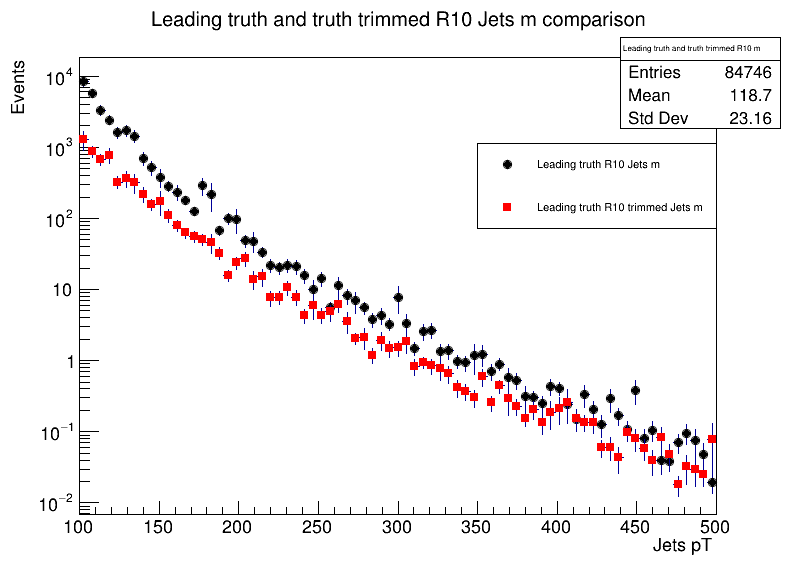

In [118]:
TLegend *leg20 = new TLegend(0.6, 0.6, 0.9, 0.75);

hist_leadtruthR10_jets_m->SetMarkerStyle(20);
hist_leadtruthR10_jets_m->SetMarkerColor(kBlack);
hist_leadtruthR10_jets_m->SetFillStyle(1001);
hist_leadtruthR10_jets_m->SetFillColor(kBlack);
hist_leadtruthR10_jets_m->SetTitle("Leading truth and truth trimmed R10 Jets m comparison");
hist_leadtruthR10_jets_m->Draw("P");
hist_leadtruthtrimmedR10_jets_m->SetMarkerStyle(21);
hist_leadtruthtrimmedR10_jets_m->SetMarkerColor(kRed);
hist_leadtruthtrimmedR10_jets_m->SetFillStyle(1003);
hist_leadtruthtrimmedR10_jets_m->SetFillColor(kRed);
hist_leadtruthtrimmedR10_jets_m->Draw("sameP");

leg20->AddEntry(hist_leadtruthR10_jets_m, "Leading truth R10 Jets m", "p");
leg20->AddEntry(hist_leadtruthtrimmedR10_jets_m, "Leading truth R10 trimmed Jets m", "p");
leg20->Draw();
canvas11->SetLogy();
canvas11->Draw();